In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Tempo médio (Reconstrução)

In [2]:
import pandas as pd
df_reconstrução = pd.read_csv("dados/_base_final/reconstrucao_municipio.csv",
                            dtype={'ibge7': str})
df_reconstrução.head()

,ibge7,tempo_medio_analise,tempo_medio_liberacao,qtd
0,1100148,165 days 00:00:00,529 days 00:00:00,1
1,1101450,18 days 00:00:00,521 days 12:00:00,2
2,1200401,220 days 00:00:00,88 days 00:00:00,1
3,1200708,53 days 00:00:00,347 days 00:00:00,1
4,1302504,146 days 00:00:00,263 days 12:00:00,2


In [3]:
df_reconstrução['analise_dias'] = df_reconstrução['tempo_medio_analise'].str.extract('^(.*?)\\s*days')
df_reconstrução['analise_dias'] = df_reconstrução['analise_dias'].astype(int)

df_reconstrução['liberacao_dias'] = df_reconstrução['tempo_medio_liberacao'].str.extract('^(.*?)\\s*days')
df_reconstrução['liberacao_dias'] = df_reconstrução['liberacao_dias'].astype(int)

df_reconstrução = df_reconstrução.drop(['tempo_medio_analise', 'tempo_medio_liberacao'], axis=1)



In [4]:
df_reconstrução.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ibge7           612 non-null    object
 1   qtd             612 non-null    int64 
 2   analise_dias    612 non-null    int64 
 3   liberacao_dias  612 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 19.3+ KB


# ICM

In [5]:
import pandas as pd

df_icm = pd.read_csv("dados/_base_final/ICM_unificado.csv",
                            dtype={'ibge7': str})

df_icm.head()

,ibge7,UF,Município,Faixa Populacional,V1,V2,V3,V4,V5,V6,...,V18,V19,V20,Porte,Perfil de Risco,DimI,DimII,DimIII,Total,icm
0,1702109,TO,Araguaína,6 - 100001 até 500000,1,1,1,1,1,1,...,1,1,1,Médio/Grande,Prioritário,8,7,5,20,A
1,2800308,SE,Aracaju,7 - Maior que 500000,1,1,1,1,1,1,...,1,1,1,Médio/Grande,Prioritário,8,7,5,20,A
2,3131901,MG,Itabirito,5 - 50001 até 100000,1,1,1,1,1,1,...,1,1,1,Pequeno,Prioritário,8,7,5,20,A
3,2504009,PB,Campina Grande,6 - 100001 até 500000,1,1,1,1,1,1,...,1,1,1,Médio/Grande,Prioritário,8,6,5,19,A
4,3106200,MG,Belo Horizonte,7 - Maior que 500000,1,1,1,1,1,1,...,1,1,1,Médio/Grande,Prioritário,8,6,5,19,A


In [6]:
print("🔍 ANALISANDO DUPLICATAS:")
print(f"df_icm: {len(df_icm)} registros")
print(f"Valores únicos ibge7 em df_icm: {df_icm['ibge7'].nunique()}")

# Verificar duplicatas no df_icm
duplicatas_icm = df_icm['ibge7'].duplicated().sum()
print(f"Duplicatas em df_icm: {duplicatas_icm}")

if duplicatas_icm > 0:
    print("\n🏙️ Municípios duplicados no df_icm:")
    municipios_duplicados = df_icm[df_icm['ibge7'].duplicated(keep=False)]['ibge7'].unique()
    print(municipios_duplicados[:10])  # Mostra os primeiros 10

🔍 ANALISANDO DUPLICATAS:
df_icm: 5593 registros
Valores únicos ibge7 em df_icm: 5444
Duplicatas em df_icm: 149

🏙️ Municípios duplicados no df_icm:
['2806602' '2410900' '2505600' '3145109' '4115358' '4205357' '4320404'
 '2206670' '2516102' '3136801']


In [7]:
df_icm_limpo  = df_icm.drop_duplicates(subset=['ibge7'], keep='first')

df_icm_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5444 entries, 0 to 5592
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ibge7               5444 non-null   object
 1   UF                  5444 non-null   object
 2   Município           5444 non-null   object
 3   Faixa Populacional  5444 non-null   object
 4   V1                  5444 non-null   int64 
 5   V2                  5444 non-null   int64 
 6   V3                  5444 non-null   int64 
 7   V4                  5444 non-null   int64 
 8   V5                  5444 non-null   int64 
 9   V6                  5444 non-null   int64 
 10  V7                  5444 non-null   int64 
 11  V8                  5444 non-null   int64 
 12  V9                  5444 non-null   int64 
 13  V10                 5444 non-null   int64 
 14  V11                 5444 non-null   int64 
 15  V12                 5444 non-null   int64 
 16  V13                 5444 non-

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
# 1. Carregue o arquivo geográfico (Mantenha o caminho correto para o seu arquivo .shp)
try:
    brasil = gpd.read_file('dados/shapes/BR_Municipios_2024/BR_Municipios_2024.shp') 
    # Supondo que a coluna com a sigla do estado seja 'SIGLA'
    print(f"CRS Original: {brasil.crs}")
except Exception as e:
    print(f"ERRO: Não foi possível carregar o arquivo shapefile. {e}")

# 2. Mescle o GeoDataFrame e o DataFrame de dados
df_icm_geo = brasil.merge(df_icm_limpo, left_on='CD_MUN', right_on='ibge7')

print("\nDados Geográficos e Numéricos mesclados com sucesso!")

CRS Original: EPSG:4674

Dados Geográficos e Numéricos mesclados com sucesso!


# Correlações

In [9]:
import pandas as pd
df_reconstrução_comp = pd.read_csv("dados/_base_final/reconstrucao_mun_completo.csv",
                                   dtype={'ibge7': str})
df_reconstrução_comp.head()


,ibge7,CNPJ,UF,Município,Processo,Protocolo,Ano,Nº Siafi,Nº município no Siafi,Nº Termo de Compromisso,...,Valor Empenhado,Data Dou,Fim vigência,Status,Nº de pessoas atendidas,Parcela 1,Parcela 2,Parcela 3,tempo_medio_analise,tempo_medio_liberacao
0,4212270,95993085000162,SC,Passos Maia,59053.008773/2022-85,REC-SC-4212270-20221118-01,2022,5743,5743,1AALZW,...,203637.06,2023-03-17,15/03/2024,ACOMPANHAMENTO - RECURSO TRANSFERIDO,104,203637.06,NaN,NaN,20 days,95 days
1,3160306,18349951000136,MG,Santo Antônio do Jacinto,59053.005872/2021-24,REC-MG-3160306-20211227-01,2021,5205,5205,1AANHG,...,1007794.79,2023-07-20,18/07/2024,ACOMPANHAMENTO - RECURSO TRANSFERIDO,35,302338.44,705456.35,NaN,210 days,360 days
2,4209201,82939471000124,SC,Lacerdópolis,59053.002381/2018-26,REC-SC-4209201-20181126-01,2018,8181,8181,697228,...,515517.31,2019-04-22,21/04/2020,ACOMPANHAMENTO - RECURSO TRANSFERIDO,210,515517.31,NaN,NaN,21 days,124 days
3,4301925,93539153000192,RS,Barra do Rio Azul,59053.011852/2023-54,REC-RS-4301925-20231114-01,2023,5959,5959,1AATUB,...,3940000.00,2024-08-06,06/08/2025,ACOMPANHAMENTO - RECURSO TRANSFERIDO,2795,1182000.00,2758000.00,NaN,146 days,117 days
4,4313466,53099656000170,RS,Novo Xingu,59053.015771/2024-12,REC-RS-4313466-20240510-01,2024,1152,1152,1aavsp,...,746980.00,2024-12-24,24/12/2025,ACOMPANHAMENTO - RECURSO TRANSFERIDO,65,746980.00,NaN,NaN,14 days,209 days


In [10]:
base_correlacao_mun = pd.merge(df_reconstrução_comp, df_icm_limpo, 
                               on = 'ibge7', 
                               how='left')

base_correlacao_mun = base_correlacao_mun.rename(columns={'UF_x': 'UF', 'Município_x': 'Município'})

base_correlacao_mun['analise_dias'] = base_correlacao_mun['tempo_medio_analise'].str.extract('^(.*?)\\s*days')
base_correlacao_mun['analise_dias'] = base_correlacao_mun['analise_dias'].astype(int)

base_correlacao_mun['liberacao_dias'] = base_correlacao_mun['tempo_medio_liberacao'].str.extract('^(.*?)\\s*days')
base_correlacao_mun['liberacao_dias'] = base_correlacao_mun['liberacao_dias'].astype(int)

base_correlacao_mun = base_correlacao_mun.drop(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
                                               'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
                                               'CNPJ','Nº Siafi','Nº município no Siafi','Nº Termo de Compromisso',
                                               'UF_y','Município_y','tempo_medio_analise','tempo_medio_liberacao'], axis=1)

# Definindo o mapeamento que reflete a ordem (A é o melhor, D é o pior)
mapeamento_icm = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1
}

# Cria a nova coluna numérica 'icm_rank'

base_correlacao_mun['icm_rank'] = base_correlacao_mun['icm'].map(mapeamento_icm)

base_correlacao_mun.head()


,ibge7,UF,Município,Processo,Protocolo,Ano,Cobrade,Data Envio,Valor Custo,Valor Liberado,...,Porte,Perfil de Risco,DimI,DimII,DimIII,Total,icm,analise_dias,liberacao_dias,icm_rank
0,4212270,SC,Passos Maia,59053.008773/2022-85,REC-SC-4212270-20221118-01,2022,13214,2022-11-22,203637.06,203637.06,...,Pequeno,Não Prioritário,3.0,2.0,1.0,6.0,B,20,95,3.0
1,3160306,MG,Santo Antônio do Jacinto,59053.005872/2021-24,REC-MG-3160306-20211227-01,2021,13214,2021-12-27,1007794.79,1007794.79,...,Pequeno,Não Prioritário,4.0,3.0,1.0,8.0,B,210,360,3.0
2,4209201,SC,Lacerdópolis,59053.002381/2018-26,REC-SC-4209201-20181126-01,2018,12200,2018-11-28,515517.31,515517.31,...,Pequeno,Prioritário,3.0,2.0,2.0,7.0,C,21,124,2.0
3,4301925,RS,Barra do Rio Azul,59053.011852/2023-54,REC-RS-4301925-20231114-01,2023,13214,2023-11-17,3939970.01,3940000.00,...,Pequeno,Não Prioritário,2.0,2.0,2.0,6.0,B,146,117,3.0
4,4313466,RS,Novo Xingu,59053.015771/2024-12,REC-RS-4313466-20240510-01,2024,13214,2024-05-15,783580.07,746980.00,...,Pequeno,Não Prioritário,3.0,2.0,0.0,5.0,D,14,209,1.0


In [11]:
#base_correlacao_mun.info()


In [12]:
#df_cobrade = pd.read_csv('dados/COBRADE.txt', sep=',')
#df_cobrade.head()

## Tempo médio de análise x ICM

In [13]:
import pandas as pd
from scipy.stats import spearmanr 

# Cria o DataFrame limpo (CORRETO)
df_clean = base_correlacao_mun[['analise_dias', 'icm_rank']].dropna()

# ----------------------------------------------------
# 2. CALCULAR A CORRELAÇÃO DE SPEARMAN (CORRIGIDO)
# ----------------------------------------------------

# Seleciona as colunas do DataFrame LIMPO
coluna_x = df_clean['analise_dias']
coluna_y = df_clean['icm_rank']

# A função spearmanr retorna dois valores: # 1. O coeficiente de correlação (rho) # 2. O valor p (p-value)

coeficiente_rho, valor_p = spearmanr(coluna_x, coluna_y)

# ----------------------------------------------------
# 3. INTERPRETAÇÃO DOS RESULTADOS
# ----------------------------------------------------


print("\nCorrelação entre ICM e dias de análise")

print(f"Coeficiente de Correlação Spearman (ρ): {coeficiente_rho:.3f}")
print(f"Valor P (p-value): {valor_p:.3f}")



if valor_p < 0.05:
    print("\n✅ A correlação é ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05).")
else:
    print("\n❌ A correlação NÃO é estatisticamente significativa (p >= 0.05).")

if coeficiente_rho > 0.1:
    print("Conclusão: Existe uma correlação positiva moderada. Quanto maior o rank do ICM (melhor a categoria), maior o tempo de análise.")
elif coeficiente_rho < -0.1:
    print("Conclusão: Existe uma correlação negativa moderada. Quanto maior o rank do ICM (melhor a categoria), menor o tempo de análise.")
else:
    print("Conclusão: A correlação é muito fraca ou inexistente.")


Correlação entre ICM e dias de análise
Coeficiente de Correlação Spearman (ρ): -0.103
Valor P (p-value): 0.002

✅ A correlação é ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05).
Conclusão: Existe uma correlação negativa moderada. Quanto maior o rank do ICM (melhor a categoria), menor o tempo de análise.


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\4200589145.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


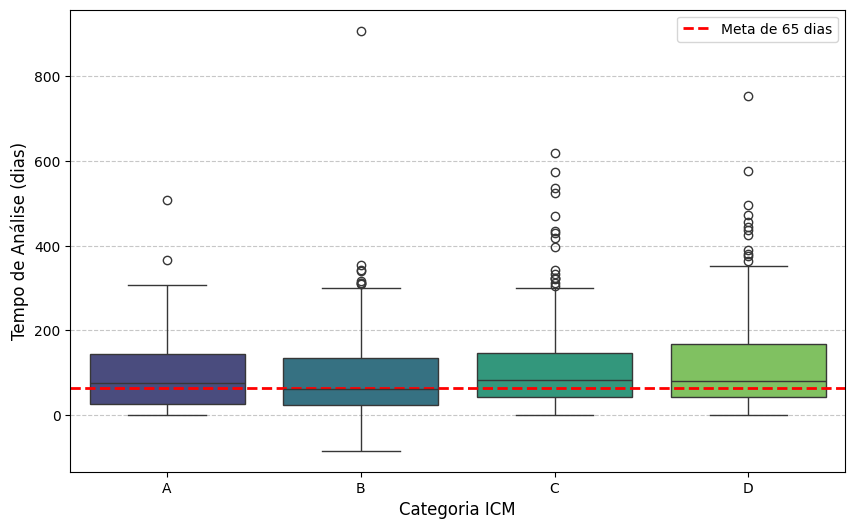

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr 

# ----------------------------------------------------
# 1. PREPARAÇÃO E CÁLCULO DA CORRELAÇÃO (Assumindo que está correto)
# ----------------------------------------------------

# Cria o DataFrame limpo, incluindo 'icm' para o Box Plot
df_clean = base_correlacao_mun[['analise_dias', 'icm_rank', 'icm']].dropna()

# Calcula a Correlação de Spearman (necessária para o título)
coeficiente_rho, valor_p = spearmanr(df_clean['analise_dias'], df_clean['icm_rank'])


# ----------------------------------------------------
# 2. CRIAÇÃO, PLOTAGEM E SALVAMENTO DO GRÁFICO
# ----------------------------------------------------

# Define o tamanho da figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Define a ordem para o eixo X (categorias ICM)
ordem_categorias_icm = ['A', 'B', 'C', 'D']

sns.boxplot(
    data=df_clean,
    x='icm', 
    y='analise_dias', 
    order=ordem_categorias_icm, 
    palette='viridis', 
    ax=ax 
)

# === INSERÇÃO DA LINHA DE REFERÊNCIA (CORREÇÃO) ===
ax.axhline(
    65,                       # Valor no eixo Y (Tempo de Análise)
    color='red',              # Cor da linha
    linestyle='--',           # Estilo da linha (tracejada)
    linewidth=2,              # Espessura
    label='Meta de 65 dias'   # Adiciona uma legenda
)
# ==================================================

# Adiciona título e rótulos
#ax.set_title(
#    f'Tempo de Análise por ICM',
#    fontsize=14
#)
ax.set_xlabel('Categoria ICM', fontsize=12)
ax.set_ylabel('Tempo de Análise (dias)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Inclui a legenda da linha de referência
ax.legend(loc='upper right')

### SALVA O ARQUIVO
fig.savefig(
    'grafico_tempo_analise_municipio_com_meta.png', # Nome ligeiramente alterado para refletir a meta
    dpi=300, 
    bbox_inches='tight' 
)

plt.show()

## Tempo médio de liberação X ICM

In [15]:
import pandas as pd
from scipy.stats import spearmanr 

# Cria o DataFrame limpo (CORRETO)
df_clean = base_correlacao_mun[['liberacao_dias', 'icm_rank']].dropna()

# ----------------------------------------------------
# 2. CALCULAR A CORRELAÇÃO DE SPEARMAN (CORRIGIDO)
# ----------------------------------------------------

# Seleciona as colunas do DataFrame LIMPO
coluna_x = df_clean['liberacao_dias']
coluna_y = df_clean['icm_rank']

# A função spearmanr retorna dois valores:
# 1. O coeficiente de correlação (rho)
# 2. O valor p (p-value)

coeficiente_rho, valor_p = spearmanr(coluna_x, coluna_y)

# ----------------------------------------------------
# 3. INTERPRETAÇÃO DOS RESULTADOS
# ----------------------------------------------------

print("\nCORRELAÇÃO entre ICM e dias para liberação do recurso")
print(f"Coeficiente de Correlação Spearman (ρ): {coeficiente_rho:.3f}")
print(f"Valor P (p-value): {valor_p:.3f}")

if valor_p < 0.05:
    print("\n✅ A correlação é ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05).")
else:
    print("\n❌ A correlação NÃO é estatisticamente significativa (p >= 0.05).")

if coeficiente_rho > 0.1:
    print("Conclusão: Existe uma correlação positiva moderada. Quanto maior o rank do ICM (melhor a categoria), maior o tempo de análise.")
elif coeficiente_rho < -0.1:
    print("Conclusão: Existe uma correlação negativa moderada. Quanto maior o rank do ICM (melhor a categoria), menor o tempo de análise.")
else:
    print("Conclusão: A correlação é muito fraca ou inexistente.")


CORRELAÇÃO entre ICM e dias para liberação do recurso
Coeficiente de Correlação Spearman (ρ): 0.008
Valor P (p-value): 0.799

❌ A correlação NÃO é estatisticamente significativa (p >= 0.05).
Conclusão: A correlação é muito fraca ou inexistente.


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\4017922884.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


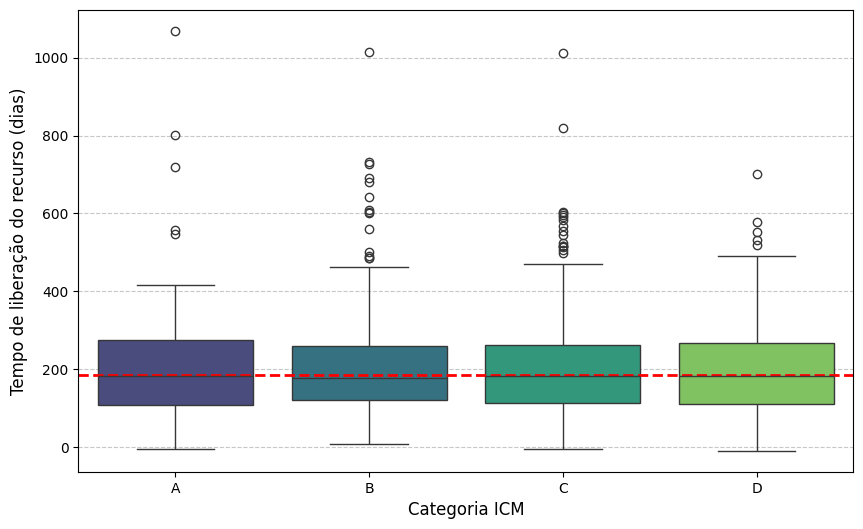

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr 

# ----------------------------------------------------
# 1. PREPARAÇÃO E CÁLCULO DA CORRELAÇÃO
# ----------------------------------------------------

# 1.1. Mapeamento para cálculo de Spearman
mapeamento_icm = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
# Cria a coluna de rank no DataFrame original (ou uma cópia)
base_correlacao_mun['icm_rank'] = base_correlacao_mun['icm'].map(mapeamento_icm)

# 1.2. Cria o DataFrame limpo para plotagem e correlação
# Inclui 'icm_rank' para o cálculo e 'icm' para o eixo X do Box Plot
df_clean = base_correlacao_mun[['liberacao_dias', 'icm', 'icm_rank']].dropna()

# 1.3. Calcula a Correlação de Spearman
coeficiente_rho, valor_p = spearmanr(df_clean['liberacao_dias'], df_clean['icm_rank'])


# ----------------------------------------------------
# 2. CRIAÇÃO, PLOTAGEM E SALVAMENTO DO GRÁFICO
# ----------------------------------------------------

# Define o tamanho da figura e os eixos (CORREÇÃO: define 'fig')
fig, ax = plt.subplots(figsize=(10, 6))

# Define a ordem para o eixo X (categorias ICM)
ordem_categorias_icm = ['A', 'B', 'C', 'D']

sns.boxplot(
    data=df_clean,
    x='icm', # Variável categórica/ordinal no eixo X
    y='liberacao_dias', # Variável numérica no eixo Y
    order=ordem_categorias_icm, # Garante a ordem correta das categorias
    palette='viridis', # Uma paleta de cores para os boxes
    ax=ax # Garante que o plot vá para o objeto 'ax'
)

# === INSERÇÃO DA LINHA DE REFERÊNCIA (CORREÇÃO) ===
ax.axhline(
    186,                       # Valor no eixo Y (Tempo de Análise)
    color='red',              # Cor da linha
    linestyle='--',           # Estilo da linha (tracejada)
    linewidth=2,              # Espessura
    label='Meta de 65 dias'   # Adiciona uma legenda
)
# ==================================================

# Adiciona título e rótulos
#ax.set_title( # Usando ax.set_title em vez de plt.title
#    f'Tempo de Liberação por ICM',
#    fontsize=14
#)
ax.set_xlabel('Categoria ICM', fontsize=12)
ax.set_ylabel('Tempo de liberação do recurso (dias)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid suave no eixo Y

### SALVA A FIGURA (PASSO CRÍTICO)
fig.savefig(
    'grafico_tempo_liberacao_municipio.png', # Nome do arquivo
    dpi=300, # Resolução
    bbox_inches='tight' # Remove margens brancas
)

plt.show()

## Tempo de análise X Estado

In [17]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 1. Preparação dos Dados
# Garante que não há NaNs nas colunas críticas
df_anova = base_correlacao_mun.dropna(subset=['analise_dias', 'UF']).copy()

# A coluna 'UF' deve ser tratada como um fator (tipo categórico)
df_anova['UF'] = df_anova['UF'].astype('category')

# 2. Definição do Modelo ANOVA
# A fórmula é: Variável_Numérica ~ Variável_Categórica
modelo_formula = 'analise_dias ~ C(UF)'

# Ajuste o modelo de regressão linear (OLS)
modelo = ols(modelo_formula, data=df_anova).fit()

# 3. Cálculo da Tabela ANOVA
tabela_anova = anova_lm(modelo)

print("--- Tabela ANOVA (Tempo de Análise por UF) ---")
print(tabela_anova)

# 4. Interpretação do Valor P
valor_p_uf = tabela_anova['PR(>F)'][0] # O Valor P para o fator 'C(UF)' é a primeira linha

print(f"\nValor P (UF): {valor_p_uf:.5f}")

if valor_p_uf < 0.05:
    print("\n✅ CONCLUSÃO ESTATÍSTICA: O Valor P é menor que 0.05. Há uma diferença estatisticamente significativa no tempo médio de análise entre os estados.")
else:
    print("\n❌ CONCLUSÃO ESTATÍSTICA: O Valor P é maior ou igual a 0.05. Não há evidência estatística de que o tempo médio de análise varie por estado.")

--- Tabela ANOVA (Tempo de Análise por UF) ---
             df        sum_sq       mean_sq        F        PR(>F)
C(UF)      22.0  1.274092e+06  57913.293647  6.36177  1.376140e-17
Residual  896.0  8.156584e+06   9103.330317      NaN           NaN

Valor P (UF): 0.00000

✅ CONCLUSÃO ESTATÍSTICA: O Valor P é menor que 0.05. Há uma diferença estatisticamente significativa no tempo médio de análise entre os estados.


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\3991861819.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p_uf = tabela_anova['PR(>F)'][0] # O Valor P para o fator 'C(UF)' é a primeira linha


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\40301353.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Gráfico salvo como 'tempo_analise_por_estado.png'


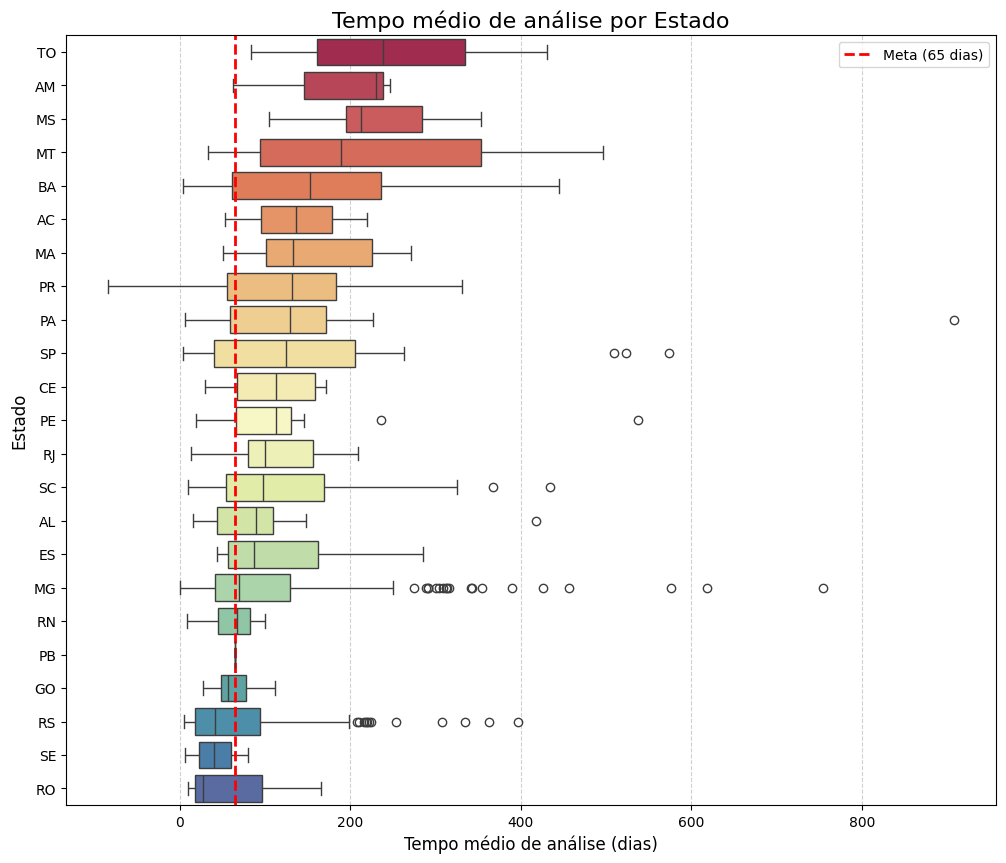

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 0. GERAÇÃO DE DADOS FICTÍCIOS (PARA TESTE) ---
# Se você já tiver o dataframe 'base_correlacao_mun', pule esta parte.
# 1. Preparação dos Dados
# Remove NaNs da coluna 'analise_dias' para garantir a integridade do plot
df_limpo = base_correlacao_mun.dropna(subset=['analise_dias', 'UF'])

# Calcular a ordem das UFs pela mediana (melhor para visualização)
ordem_uf = (
    df_limpo.groupby('UF')['analise_dias']
    .median()
    .sort_values(ascending=False)
    .index.tolist()
)

# 2. Criação do Box Plot
plt.figure(figsize=(12, 10))

sns.boxplot(
    data=df_limpo,
    x='analise_dias', # Variável numérica no eixo X
    y='UF',           # Variável categórica no eixo Y
    order=ordem_uf,   # Ordena pelo tempo de análise
    palette='Spectral'
)

# --- ADICIONANDO A LINHA DE REFERÊNCIA ---
plt.axvline(x=65, color='red', linestyle='--', linewidth=2, label='Meta (65 dias)')

# Adiciona título e rótulos
plt.title('Tempo médio de análise por Estado', fontsize=16)
plt.xlabel('Tempo médio de análise (dias)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.legend() # Adiciona a legenda para mostrar o label da linha vermelha
plt.grid(axis='x', linestyle='--', alpha=0.6)

# --- SALVANDO A FIGURA ---
# bbox_inches='tight': Garante que nada (como legendas ou eixos) seja cortado
# dpi=300: Alta resolução para documentos ou impressão (padrão de tela é 72 ou 96)
plt.savefig('tempo_analise_por_estado.png', dpi=300, bbox_inches='tight')

# Se quiser salvar em PDF (vetorial, melhor para artigos):
# plt.savefig('tempo_analise_por_estado.pdf', bbox_inches='tight')

print("Gráfico salvo como 'tempo_analise_por_estado.png'")

# Exibir o gráfico (Opcional se estiver rodando apenas para salvar)
plt.show()

### Tempo Liberação por Estado

In [19]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 1. Preparação dos Dados
# Garante que não há NaNs nas colunas críticas
df_anova = base_correlacao_mun.dropna(subset=['liberacao_dias', 'UF']).copy()

# A coluna 'UF' deve ser tratada como um fator (tipo categórico)
df_anova['UF'] = df_anova['UF'].astype('category')

# 2. Definição do Modelo ANOVA
# A fórmula é: Variável_Numérica ~ Variável_Categórica
modelo_formula = 'liberacao_dias ~ C(UF)'

# Ajuste o modelo de regressão linear (OLS)
modelo = ols(modelo_formula, data=df_anova).fit()

# 3. Cálculo da Tabela ANOVA
tabela_anova = anova_lm(modelo)

print("--- Tabela ANOVA (Tempo de Liberação por UF) ---")
print(tabela_anova)

# 4. Interpretação do Valor P
valor_p_uf = tabela_anova['PR(>F)'][0] # O Valor P para o fator 'C(UF)' é a primeira linha

print(f"\nValor P (UF): {valor_p_uf:.5f}")

if valor_p_uf < 0.05:
    print("\n✅ CONCLUSÃO ESTATÍSTICA: O Valor P é menor que 0.05. Há uma diferença estatisticamente significativa no tempo médio de liberação entre os estados.")
else:
    print("\n❌ CONCLUSÃO ESTATÍSTICA: O Valor P é maior ou igual a 0.05. Não há evidência estatística de que o tempo médio de liberação varie por estado.")

--- Tabela ANOVA (Tempo de Liberação por UF) ---
             df        sum_sq       mean_sq         F        PR(>F)
C(UF)      22.0  1.430887e+06  65040.332623  3.619859  4.762035e-08
Residual  896.0  1.609901e+07  17967.640738       NaN           NaN

Valor P (UF): 0.00000

✅ CONCLUSÃO ESTATÍSTICA: O Valor P é menor que 0.05. Há uma diferença estatisticamente significativa no tempo médio de liberação entre os estados.


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\2517035257.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p_uf = tabela_anova['PR(>F)'][0] # O Valor P para o fator 'C(UF)' é a primeira linha


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\811971840.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


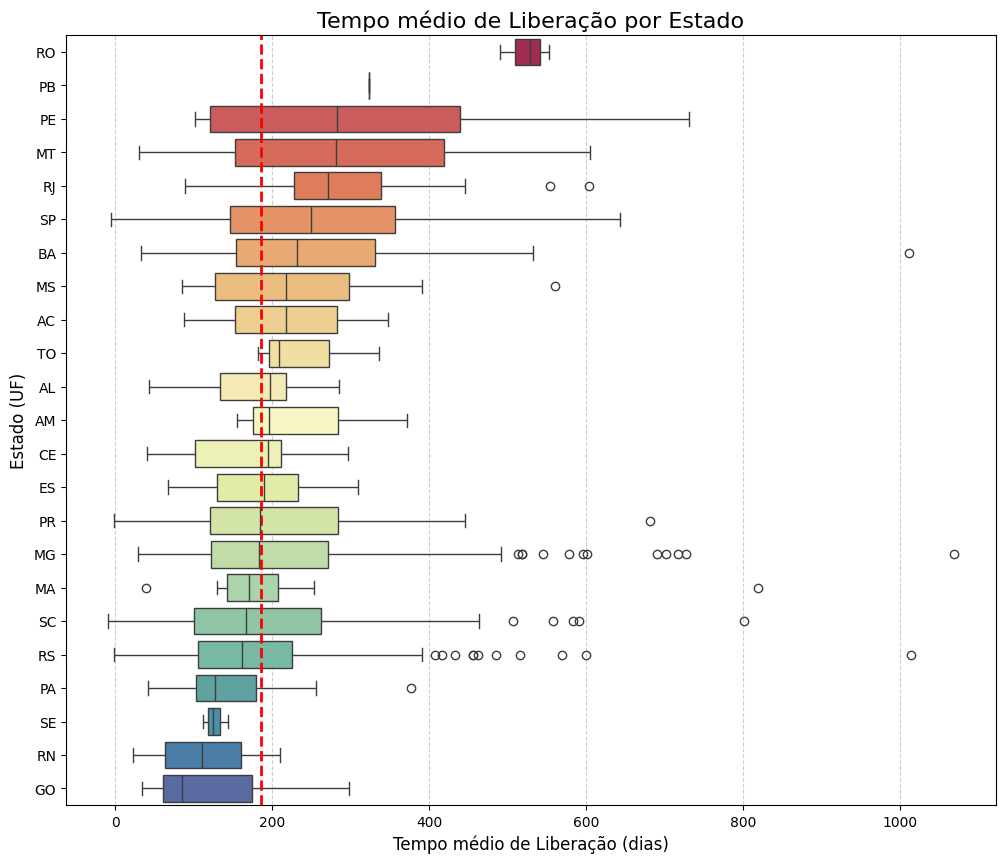

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparação dos Dados
# Remove NaNs da coluna 'liberacao_dias' e 'UF'
df_limpo = base_correlacao_mun.dropna(subset=['liberacao_dias', 'UF'])

# Ordenação das UFs pela mediana
ordem_uf = (
    df_limpo.groupby('UF')['liberacao_dias']
    .median()
    .sort_values(ascending=False)
    .index.tolist()
)



# 2. Criação do Box Plot
plt.figure(figsize=(12, 10))

sns.boxplot(
    data=df_limpo,
    x='liberacao_dias',
    y='UF',
    order=ordem_uf,
    palette='Spectral'
)

# --- ADICIONANDO A LINHA DE REFERÊNCIA ---
plt.axvline(x=186, color='red', linestyle='--', linewidth=2, label='Meta (186 dias)')


# Adiciona título e rótulos
plt.title('Tempo médio de Liberação por Estado', fontsize=16)
plt.xlabel('Tempo médio de Liberação (dias)', fontsize=12)
plt.ylabel('Estado (UF)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# --- COMANDO PARA SALVAR ---
# bbox_inches='tight': Garante que os nomes dos estados (eixo Y) não sejam cortados
# dpi=300: Alta resolução para documentos ou impressão
plt.savefig('distribuicao_liberacao_uf.png', bbox_inches='tight', dpi=300)

# Exibe o gráfico (limpa a memória após exibir)
plt.show()

# MAPAS

In [21]:
# Agrupa por UF e calcula a média das colunas selecionadas
df = base_correlacao_mun.dropna(subset=['analise_dias', 'UF', 'liberacao_dias', 'icm_rank']).copy()

df_medias_uf = df.groupby('UF')[['analise_dias', 'liberacao_dias', 'icm_rank']].mean().reset_index()


df_medias_uf.head(30)

,UF,analise_dias,liberacao_dias,icm_rank
0,AC,136.500000,217.500000,3.000000
1,AL,105.153846,185.538462,2.230769
2,AM,179.666667,241.000000,2.000000
3,BA,154.452381,267.595238,1.809524
4,CE,104.555556,174.111111,2.111111
5,ES,112.750000,181.166667,2.750000
6,GO,61.500000,126.300000,2.200000
7,MA,154.750000,218.833333,1.500000
8,MG,100.665541,211.577703,2.206081
9,MS,232.363636,237.454545,2.636364


## Tempo de analise

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
# 1. Carregue o arquivo geográfico (Mantenha o caminho correto para o seu arquivo .shp)
try:
    brasil = gpd.read_file('dados/shapes/BR_UF_2024/BR_UF_2024.shp') 
    # Supondo que a coluna com a sigla do estado seja 'SIGLA'
    print(f"CRS Original: {brasil.crs}")
except Exception as e:
    print(f"ERRO: Não foi possível carregar o arquivo shapefile. {e}")

# 2. Mescle o GeoDataFrame e o DataFrame de dados
df_reconstrução_geo = brasil.merge(df_medias_uf, left_on='SIGLA_UF', right_on='UF')

print("\nDados Geográficos e Numéricos mesclados com sucesso!")

CRS Original: EPSG:4674

Dados Geográficos e Numéricos mesclados com sucesso!


In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import numpy as np

# 1. Defina os valores mínimo e máximo da sua coluna
min_val = df_reconstrução_geo['analise_dias'].min()
max_val = df_reconstrução_geo['analise_dias'].max()

# 2. Defina o ponto de transição Verde -> Amarelo -> Vermelho
ponto_transicao = 70

# 3. Normalize o ponto de transição para o intervalo [0, 1]
# Isso diz ao Matplotlib onde, percentualmente, a cor deve mudar no Colormap.
transicao_normalizada = (ponto_transicao - min_val) / (max_val - min_val)

# Garante que a transição fique entre 0.01 e 0.99 para evitar erros
if transicao_normalizada <= 0:
    transicao_normalizada = 0.01
elif transicao_normalizada >= 1:
    transicao_normalizada = 0.99

# 4. Crie o Colormap Contínuo Personalizado (Cores + Pontos de Controle)
# [Valor Normalizado (0 a 1), Cor]
cores = [
    (0.0, '#117A65'), # Verde Escuro (Min)
    (transicao_normalizada, '#F9E79F'), # Amarelo Claro (no ponto 186)
    (1.0, '#E74C3C') # Vermelho Escuro (Max)
]

# Cria o Colormap Contínuo
cmap_personalizado = LinearSegmentedColormap.from_list("verde_amarelo_vermelho", cores)

# 5. Define o Normalizador (BoundaryNorm)
# Usaremos o BoundaryNorm para garantir que o ponto 186 seja exatamente o meio da transição.
# O cmap_personalizado já garante o gradiente, mas o norm ajuda na legenda.
limites = np.linspace(min_val, max_val, 256) # 256 é o número de divisões (cores) do seu Colormap.
norm_cont = BoundaryNorm(limites, cmap_personalizado.N)

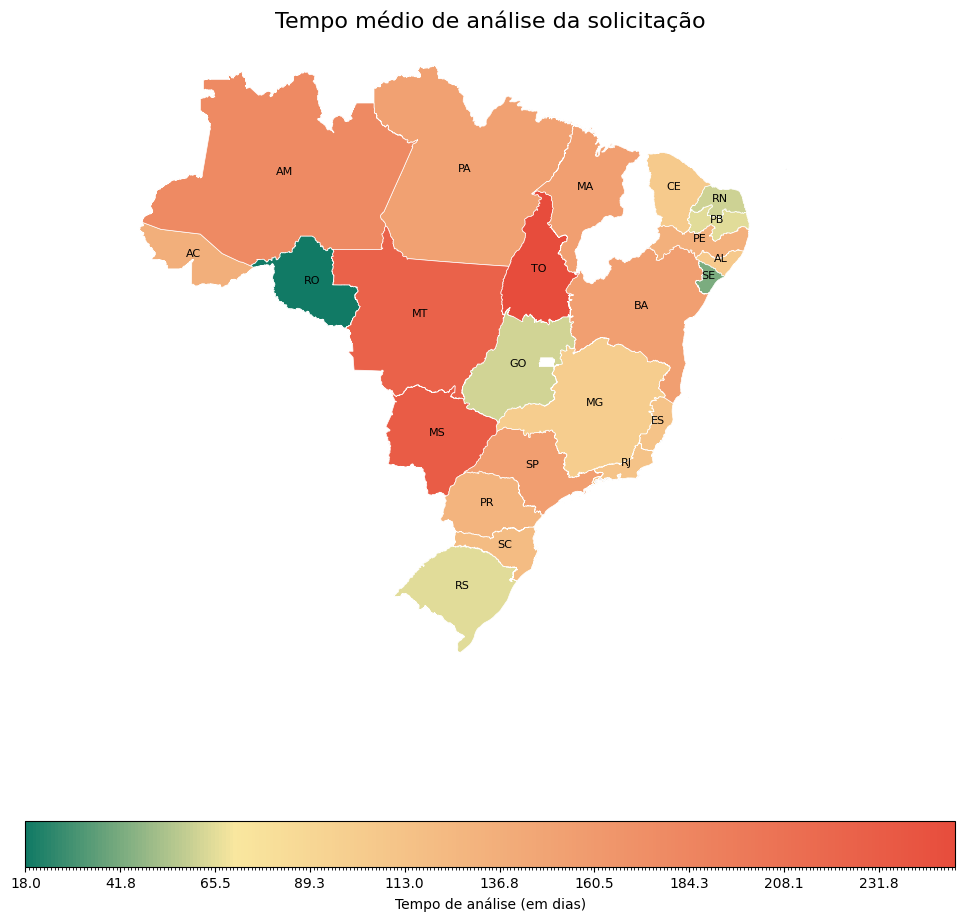

In [24]:
# 1. Define o tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 2. Plota o mapa temático usando a coluna 'POPULACAO_MILHOES'
df_reconstrução_geo.plot(
    column='analise_dias', 
    ax=ax, 
    legend=True, 
    cmap=cmap_personalizado,  # Colormap personalizado
    norm=norm_cont,
    edgecolor='white',  # Define a cor da borda como branco
    linewidth=0.5,
    legend_kwds={'label': "Tempo de análise (em dias)", 'orientation': "horizontal"}
)

# 3. Adiciona os Rótulos (CORREÇÃO AQUI)
for idx, row in df_reconstrução_geo.iterrows():
    # Calcular o centroide
    centro_x = row.geometry.centroid.x
    centro_y = row.geometry.centroid.y

    # Extrair o valor que você quer rotular
    # MUDANÇA: Use row['UF'] para obter a sigla do estado
    rotulo_uf = row['UF'] 

    # Coloque o texto no mapa usando ax.text()
    ax.text(
        centro_x,
        centro_y,
        rotulo_uf, # O rótulo é a sigla (UF)
        horizontalalignment='center',
        fontsize=8,
        color='black', # Cor do texto
#        fontweight='bold'
    )


# 3. Formatação
ax.set_title('Tempo médio de análise da solicitação', fontsize=16)
ax.set_axis_off() 

### SALVA
fig.savefig(
    'mapa_tempo_analise_UF.png', 
    dpi=300, # Define a resolução em 300 DPI (ideal para alta qualidade)
    bbox_inches='tight' # Remove espaços em branco desnecessários ao redor do mapa
)

# 4. Exibe
plt.show()

## Tempo de liberação

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import numpy as np

# 1. Defina os valores mínimo e máximo da sua coluna
min_val = df_reconstrução_geo['liberacao_dias'].min()
max_val = df_reconstrução_geo['liberacao_dias'].max()

# 2. Defina o ponto de transição Verde -> Amarelo -> Vermelho
ponto_transicao = 210

# 3. Normalize o ponto de transição para o intervalo [0, 1]
# Isso diz ao Matplotlib onde, percentualmente, a cor deve mudar no Colormap.
transicao_normalizada = (ponto_transicao - min_val) / (max_val - min_val)

# Garante que a transição fique entre 0.01 e 0.99 para evitar erros
if transicao_normalizada <= 0:
    transicao_normalizada = 0.01
elif transicao_normalizada >= 1:
    transicao_normalizada = 0.99

# 4. Crie o Colormap Contínuo Personalizado (Cores + Pontos de Controle)
# [Valor Normalizado (0 a 1), Cor]
cores = [
    (0.0, '#117A65'), # Verde Escuro (Min)
    (transicao_normalizada, '#F9E79F'), # Amarelo Claro (no ponto 186)
    (1.0, '#E74C3C') # Vermelho Escuro (Max)
]

# Cria o Colormap Contínuo
cmap_personalizado = LinearSegmentedColormap.from_list("verde_amarelo_vermelho", cores)

# 5. Define o Normalizador (BoundaryNorm)
# Usaremos o BoundaryNorm para garantir que o ponto 186 seja exatamente o meio da transição.
# O cmap_personalizado já garante o gradiente, mas o norm ajuda na legenda.
limites = np.linspace(min_val, max_val, 256) # 256 é o número de divisões (cores) do seu Colormap.
norm_cont = BoundaryNorm(limites, cmap_personalizado.N)

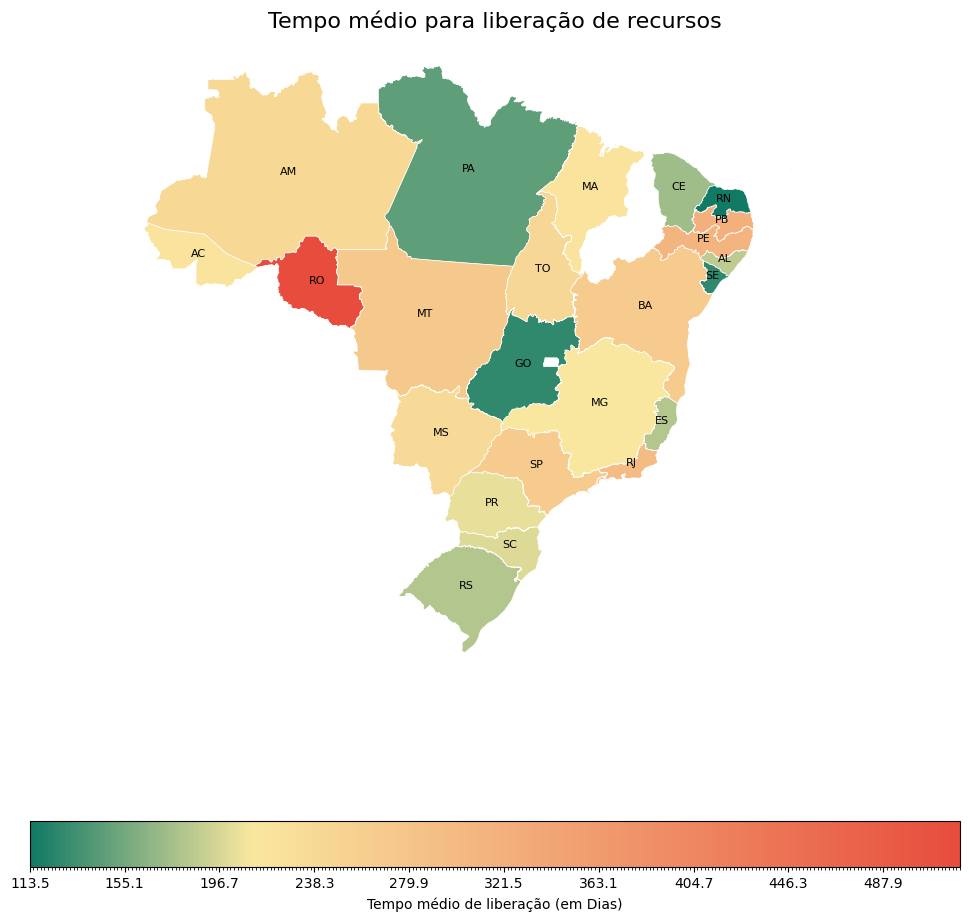

In [26]:
# 1. Define o tamanho da figura
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 2. Plota o mapa temático usando a coluna 'liberação de dias'
df_reconstrução_geo.plot(
    column='liberacao_dias', 
    ax=ax, 
    legend=True, 
    cmap=cmap_personalizado,  # Colormap personalizado
    norm=norm_cont,
    edgecolor='white',  # Define a cor da borda como branco
    linewidth=0.5,
    legend_kwds={'label': "Tempo médio de liberação (em Dias)", 'orientation': "horizontal"}
)

# 3. Adiciona os Rótulos (CORREÇÃO AQUI)
for idx, row in df_reconstrução_geo.iterrows():
    # Calcular o centroide
    centro_x = row.geometry.centroid.x
    centro_y = row.geometry.centroid.y

    # Extrair o valor que você quer rotular
    # MUDANÇA: Use row['UF'] para obter a sigla do estado
    rotulo_uf = row['UF'] 

    # Coloque o texto no mapa usando ax.text()
    ax.text(
        centro_x,
        centro_y,
        rotulo_uf, # O rótulo é a sigla (UF)
        horizontalalignment='center',
        fontsize=8,
        color='black', # Cor do texto
#        fontweight='bold'
    )


# 3. Formatação
ax.set_title('Tempo médio para liberação de recursos', fontsize=16)
ax.set_axis_off() 

### SALVA
fig.savefig(
    'mapa_tempo_liberacao_UF.png', 
    dpi=300, # Define a resolução em 300 DPI (ideal para alta qualidade)
    bbox_inches='tight' # Remove espaços em branco desnecessários ao redor do mapa
)

# 4. Exibe
plt.show()

# Categorias

In [27]:
import pandas as pd
df = pd.read_csv("dados/_base_final/classificacoes_relatorios.csv",
#                                   dtype={'ibge7': str}
                           )
#df_categorias = df_categorias.dropna(subset=['Objeto da Solicitação']) 
df = df[['Objeto da Solicitação','Protocolo']].dropna()   

df_categorias = pd.merge(base_correlacao_mun, df, on='Protocolo', how='left')

df_categorias = df_categorias.dropna(subset=['Objeto da Solicitação'])

df_categorias.head()


,ibge7,UF,Município,Processo,Protocolo,Ano,Cobrade,Data Envio,Valor Custo,Valor Liberado,...,Perfil de Risco,DimI,DimII,DimIII,Total,icm,analise_dias,liberacao_dias,icm_rank,Objeto da Solicitação
0,4212270,SC,Passos Maia,59053.008773/2022-85,REC-SC-4212270-20221118-01,2022,13214,2022-11-22,203637.06,203637.06,...,Não Prioritário,3.0,2.0,1.0,6.0,B,20,95,3.0,pontes
2,4209201,SC,Lacerdópolis,59053.002381/2018-26,REC-SC-4209201-20181126-01,2018,12200,2018-11-28,515517.31,515517.31,...,Prioritário,3.0,2.0,2.0,7.0,C,21,124,2.0,pontes
3,4301925,RS,Barra do Rio Azul,59053.011852/2023-54,REC-RS-4301925-20231114-01,2023,13214,2023-11-17,3939970.01,3940000.00,...,Não Prioritário,2.0,2.0,2.0,6.0,B,146,117,3.0,edificações/prédios públicos
8,3139409,MG,Manhuaçu,59053.005890/2021-14,REC-MG-3139409-20211231-01,2021,13214,2021-12-31,1110695.72,1110695.72,...,Prioritário,5.0,4.0,1.0,10.0,C,33,147,2.0,muros de contenção
9,5006259,MS,Novo Horizonte do Sul,59053.001501/2018-78,REC-MS-5006259-20180105-01,2018,13214,2018-02-03,381555.69,381555.69,...,Não Prioritário,2.0,2.0,3.0,7.0,B,256,561,3.0,pontes


In [28]:
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 918
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ibge7                    563 non-null    object 
 1   UF                       563 non-null    object 
 2   Município                563 non-null    object 
 3   Processo                 563 non-null    object 
 4   Protocolo                563 non-null    object 
 5   Ano                      563 non-null    int64  
 6   Cobrade                  563 non-null    int64  
 7   Data Envio               563 non-null    object 
 8   Valor Custo              563 non-null    float64
 9   Valor Liberado           563 non-null    float64
 10  Plano Interno            563 non-null    object 
 11  PTRES                    562 non-null    float64
 12  PT                       563 non-null    object 
 13  Fonte                    563 non-null    int64  
 14  GND                      563 no

In [29]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparação dos Dados
# Garante que não há NaNs nas colunas críticas
df_anova = df_categorias.dropna(subset=['analise_dias', 'Objeto da Solicitação']).copy()

# Verificação básica dos dados
print(f"Tamanho da amostra: {len(df_anova)}")
print(f"Número de categorias: {df_anova['Objeto da Solicitação'].nunique()}")
print(f"Contagem por categoria:\n{df_anova['Objeto da Solicitação'].value_counts()}")

# A coluna 'Objeto da Solicitação' deve ser tratada como um fator (tipo categórico)
df_anova['Objeto da Solicitação'] = df_anova['Objeto da Solicitação'].astype('category')

# 2. Verificação dos pressupostos da ANOVA
print("\n--- VERIFICAÇÃO DOS PRESSUPOSTOS ---")

# Verificar se há pelo menos 2 grupos com dados suficientes
categoria_counts = df_anova['Objeto da Solicitação'].value_counts()
categorias_validas = categoria_counts[categoria_counts >= 2].index
df_anova_filtrado = df_anova[df_anova['Objeto da Solicitação'].isin(categorias_validas)]

print(f"Categorias com dados suficientes: {len(categorias_validas)}")
print(f"Novo tamanho da amostra: {len(df_anova_filtrado)}")

# Verificar normalidade dos resíduos (teste de Shapiro-Wilk) - APENAS se tiver dados suficientes
if len(df_anova_filtrado) > 3:
    try:
        # USAR CRASES para nomes de colunas com espaços
        modelo_teste = ols('analise_dias ~ C(`Objeto da Solicitação`)', data=df_anova_filtrado).fit()
        residuos = modelo_teste.resid
        
        # Apenas fazer Shapiro-Wilk se não houver muitos dados (máximo 5000)
        if len(residuos) <= 5000:
            stat_shapiro, p_shapiro = stats.shapiro(residuos)
            print(f"Teste de normalidade (Shapiro-Wilk): p-value = {p_shapiro:.5f}")
            
            if p_shapiro < 0.05:
                print("⚠️  AVISO: Os resíduos não seguem distribuição normal. Considere transformação dos dados.")
        else:
            print("ℹ️  Amostra muito grande para Shapiro-Wilk, pulando teste de normalidade")
    except Exception as e:
        print(f"⚠️  Erro no teste de normalidade: {e}")
else:
    print("ℹ️  Amostra insuficiente para verificação de pressupostos")

# 3. Definição do Modelo ANOVA
# USAR CRASES para nomes de colunas com espaços
modelo_formula = 'analise_dias ~ C(`Objeto da Solicitação`)'

# Ajuste o modelo de regressão linear (OLS) com dados filtrados
try:
    modelo = ols(modelo_formula, data=df_anova_filtrado).fit()
    
    # 4. Cálculo da Tabela ANOVA
    tabela_anova = anova_lm(modelo)
    
    print("\n--- Tabela ANOVA (Tempo de Análise por Objeto da Solicitação) ---")
    print(tabela_anova)
    
    # 5. Cálculo de estatísticas descritivas
    estatisticas_descritivas = df_anova_filtrado.groupby('Objeto da Solicitação')['analise_dias'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    
    print("\n--- Estatísticas Descritivas por Categoria ---")
    print(estatisticas_descritivas)
    
    # 6. Interpretação do Valor P
    valor_p = tabela_anova['PR(>F)'][0]  # O Valor P para o fator é a primeira linha
    
    print(f"\nValor P: {valor_p:.10f}")
    print(f"Valor P (notação científica): {valor_p:.2e}")
    
    # 7. Conclusão Estatística
    alpha = 0.05
    if valor_p < alpha:
        print(f"\n✅ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.10f}) é menor que {alpha}.")
        print("Há uma diferença estatisticamente significativa no tempo médio de análise entre os Objetos da Solicitação.")
        
        # Calcular o tamanho do efeito (Eta Squared)
        ss_between = tabela_anova['sum_sq'][0]
        ss_total = tabela_anova['sum_sq'].sum()
        eta_squared = ss_between / ss_total
        
        print(f"📊 Tamanho do efeito (Eta-squared): {eta_squared:.4f}")
        
        if eta_squared < 0.01:
            print("   Efeito: Muito pequeno")
        elif eta_squared < 0.06:
            print("   Efeito: Pequeno")
        elif eta_squared < 0.14:
            print("   Efeito: Médio")
        else:
            print("   Efeito: Grande")
            
    else:
        print(f"\n❌ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.5f}) é maior ou igual a {alpha}.")
        print("Não há evidência estatística de que o tempo médio de análise varie por Objeto da Solicitação.")
    
    # 8. Teste Post-Hoc se significativo
    if valor_p < 0.05:
        try:
            from statsmodels.stats.multicomp import pairwise_tukeyhsd
            
            print("\n--- Teste Post-Hoc de Tukey ---")
            tukey = pairwise_tukeyhsd(
                endog=df_anova_filtrado['analise_dias'],
                groups=df_anova_filtrado['Objeto da Solicitação'],
                alpha=0.05
            )
            print(tukey)
        except Exception as e:
            print(f"⚠️  Erro no teste post-hoc: {e}")
    
    # 9. Visualização com linha em 65 dias
    plt.figure(figsize=(12, 8))
    
    # Ordenar categorias pela mediana
    ordem_categorias = df_anova_filtrado.groupby('Objeto da Solicitação')['analise_dias'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df_anova_filtrado, 
                x='analise_dias', 
                y='Objeto da Solicitação',
                order=ordem_categorias)
    
    # Adicionar linha vertical em 65 dias
    plt.axvline(x=65, color='red', linestyle='--', linewidth=2, label='Limite de 65 dias')
    
    plt.title('Tempo de Análise do Recurso por Objeto da Solicitação\n(Linha vermelha: limite de 65 dias)', fontsize=14, fontweight='bold')
    plt.xlabel('Tempo de Análise (dias)', fontsize=12)
    plt.ylabel('Objeto da Solicitação', fontsize=12)
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    
    # Salvar a figura
    plt.savefig('tempo_analise_recurso_com_limite.png', dpi=300, bbox_inches='tight')
    plt.savefig('tempo_analise_recurso_com_limite.pdf', bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráfico salvo como 'tempo_analise_recurso_com_limite.png' e '.pdf'")
    
except Exception as e:
    print(f"❌ Erro na execução da ANOVA: {e}")
    print("Possíveis causas:")
    print("- Muitas categorias com poucos dados")
    print("- Problemas com a variabilidade dos dados")

Tamanho da amostra: 563
Número de categorias: 17
Contagem por categoria:
Objeto da Solicitação
pontes                          229
edificações/prédios públicos     87
unidades habitacionais           82
muros de contenção               60
pavimentação                     49
bueiros e galerias               29
equipamentos urbanos              7
canais de drenagem                4
quadras poliesportivas            4
barragens e açudes                3
campo de futebol                  2
cais e docas                      2
materiais de construção           1
defesas costeiras                 1
rede de água potável              1
sistema de captação de água       1
praças                            1
Name: count, dtype: int64

--- VERIFICAÇÃO DOS PRESSUPOSTOS ---
Categorias com dados suficientes: 12
Novo tamanho da amostra: 558
⚠️  Erro no teste de normalidade: invalid syntax (<unknown>, line 1)
❌ Erro na execução da ANOVA: invalid syntax (<unknown>, line 1)
Possíveis causas:
- Muitas cat

=== PREPARAÇÃO DOS DADOS PARA ANOVA ===

Tamanho inicial da amostra: 563
Número inicial de categorias: 17

--- FILTRAGEM DE CATEGORIAS ---
Distribuição original:
Objeto da Solicitação
pontes                          229
edificações/prédios públicos     87
unidades habitacionais           82
muros de contenção               60
pavimentação                     49
bueiros e galerias               29
equipamentos urbanos              7
canais de drenagem                4
quadras poliesportivas            4
barragens e açudes                3
campo de futebol                  2
cais e docas                      2
materiais de construção           1
defesas costeiras                 1
rede de água potável              1
sistema de captação de água       1
praças                            1
Name: count, dtype: int64

Filtro aplicado: mínimo de 5 observações por categoria
Categorias válidas após filtro: 7
Novo tamanho da amostra: 543
Redução de 20 observações removidas


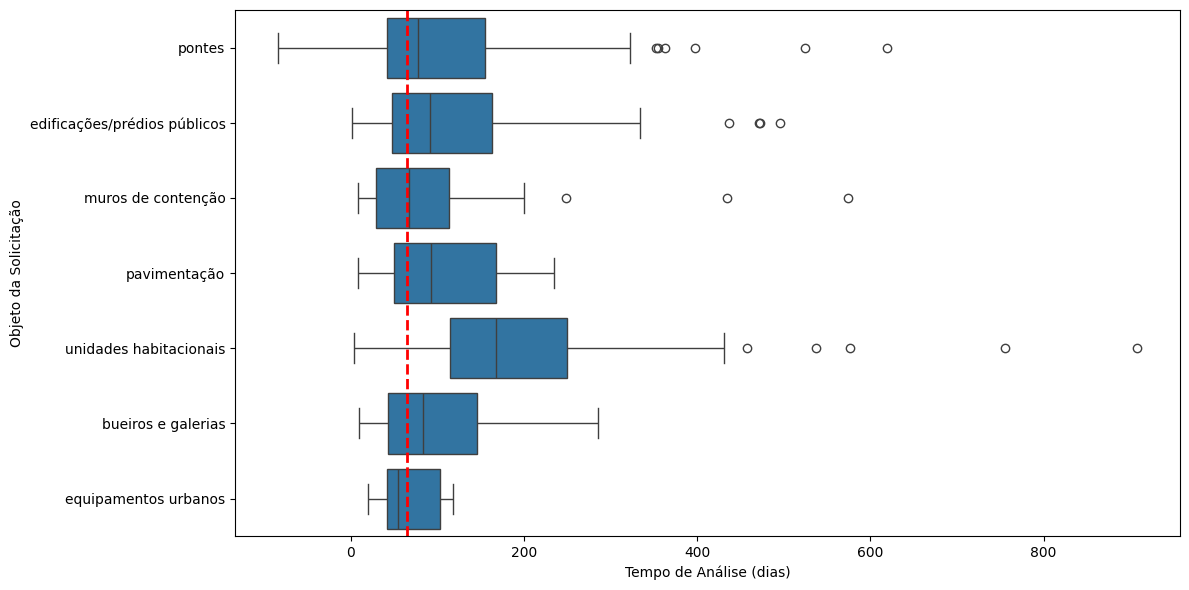


--- ESTATÍSTICAS DESCRITIVAS ---
                                n   média  mediana  desvio_padrão  mínimo  \
Objeto da Solicitação                                                       
bueiros e galerias             29  104.48     83.0          80.55      10   
edificações/prédios públicos   87  127.64     92.0         112.86       1   
equipamentos urbanos            7   68.57     54.0          39.17      20   
muros de contenção             60   92.33     67.5          96.33       8   
pavimentação                   49  106.31     93.0          69.70       8   
pontes                        229  106.96     78.0          96.10     -84   
unidades habitacionais         82  209.79    168.0         153.73       4   

                              máximo  
Objeto da Solicitação                 
bueiros e galerias               285  
edificações/prédios públicos     496  
equipamentos urbanos             118  
muros de contenção               574  
pavimentação                     235  

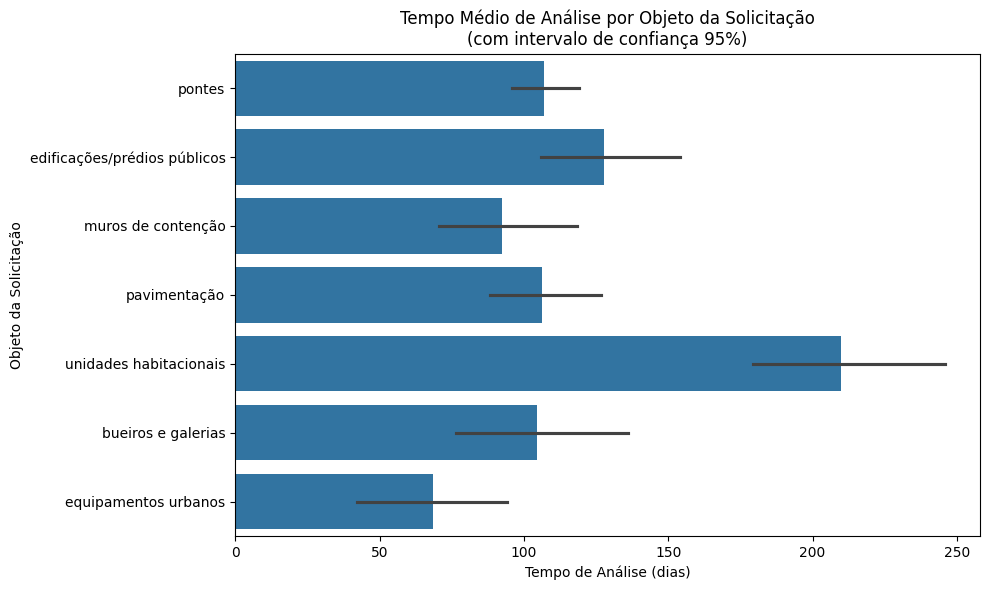


--- VERIFICAÇÃO DE VARIABILIDADE ---
Desvio padrão por categoria:
Objeto da Solicitação
bueiros e galerias               80.546624
edificações/prédios públicos    112.864910
equipamentos urbanos             39.174214
muros de contenção               96.332522
pavimentação                     69.702703
pontes                           96.101636
unidades habitacionais          153.727733
Name: analise_dias, dtype: float64

=== EXECUÇÃO DA ANOVA ===

--- TABELA ANOVA ---
              df        sum_sq        mean_sq          F        PR(>F)
C(Objeto)    6.0  7.791521e+05  129858.676571  11.434888  4.742617e-12
Residual   536.0  6.087008e+06   11356.357631        NaN           NaN
✅ Tabela ANOVA salva em 'figuras_anova/tabela_anova.csv'

--- RESULTADOS ---
Valor P: 0.0000000000
Valor P (notação científica): 4.74e-12

✅ CONCLUSÃO ESTATÍSTICA: O Valor P (4.7426e-12) é menor que 0.05.
Há uma diferença estatisticamente significativa no tempo médio de análise entre os Objetos da Solicitação.
📊

C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\2524171628.py:113: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p = tabela_anova['PR(>F)'][0]
C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\2524171628.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = tabela_anova['sum_sq'][0]


                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                       group2            meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------------------------------
          bueiros e galerias edificações/prédios públicos  23.1609 0.9508   -44.466  90.7879  False
          bueiros e galerias         equipamentos urbanos -35.9113 0.9849  -168.728  96.9053  False
          bueiros e galerias           muros de contenção -12.1494 0.9988   -83.479  59.1802  False
          bueiros e galerias                 pavimentação   1.8234    1.0   -72.069  75.7157  False
          bueiros e galerias                       pontes   2.4736    1.0  -59.6909  64.6381  False
          bueiros e galerias       unidades habitacionais 105.3099 0.0001   37.1695 173.4504   True
edificações/prédios públicos         equipamentos urbanos -59.0722 0.7959 -182.9818  64.8373  False


<Figure size 1200x800 with 0 Axes>

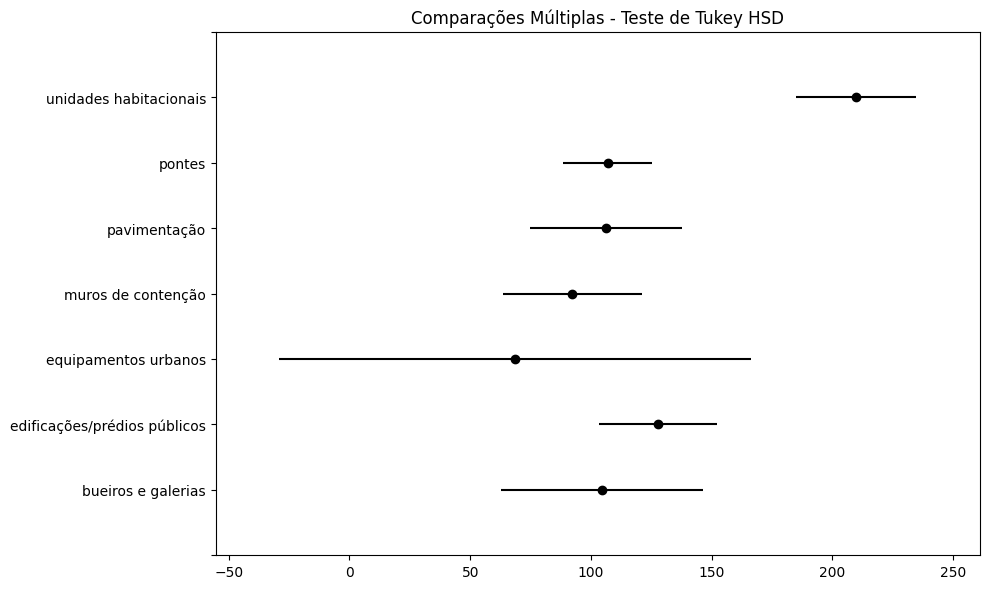

❌ Erro na execução da ANOVA: list indices must be integers or slices, not tuple

--- TENTATIVA COM ABORDAGEM ALTERNATIVA ---
Estatística F: 11.4349
Valor P: 0.0000000000
Valor P (notação científica): 4.74e-12
✅ Diferença estatisticamente significativa (ANOVA alternativa)

=== RESUMO FINAL ===
• Amostra analisada: 543 observações
• Categorias incluídas: 7
• Categorias excluídas: 10
• Categorias analisadas: ['pontes', 'edificações/prédios públicos', 'unidades habitacionais', 'muros de contenção', 'pavimentação', 'bueiros e galerias', 'equipamentos urbanos']

✅ Todas as figuras e resultados salvos na pasta 'figuras_anova/'
📁 Arquivos gerados:
   - boxplot_tempo_analise.png/.pdf
   - medias_com_intervalo_confianca.png/.pdf
   - estatisticas_descritivas.csv
   - tabela_anova.csv
   - resultado_tukey.txt (se aplicável)
   - tukey_comparacoes_multiplas.png/.pdf (se aplicável)
   - diferencas_significativas_tukey.png/.pdf (se aplicável)
   - resumo_analise.txt


<Figure size 1000x600 with 0 Axes>

In [34]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Criar diretório para salvar as figuras (se não existir)
os.makedirs('figuras_anova', exist_ok=True)

# 1. Preparação dos Dados
print("=== PREPARAÇÃO DOS DADOS PARA ANOVA ===\n")

# Garante que não há NaNs nas colunas críticas
df_anova = df_categorias.dropna(subset=['analise_dias', 'Objeto da Solicitação']).copy()

print(f"Tamanho inicial da amostra: {len(df_anova)}")
print(f"Número inicial de categorias: {df_anova['Objeto da Solicitação'].nunique()}")

# 2. Filtrar categorias com número suficiente de dados
print("\n--- FILTRAGEM DE CATEGORIAS ---")

# Definir mínimo de observações por categoria (recomendado: pelo menos 5-10)
min_observacoes = 5

categoria_counts = df_anova['Objeto da Solicitação'].value_counts()
print("Distribuição original:")
print(categoria_counts)

# Manter apenas categorias com número suficiente de observações
categorias_validas = categoria_counts[categoria_counts >= min_observacoes].index
df_filtrado = df_anova[df_anova['Objeto da Solicitação'].isin(categorias_validas)].copy()

print(f"\nFiltro aplicado: mínimo de {min_observacoes} observações por categoria")
print(f"Categorias válidas após filtro: {len(categorias_validas)}")
print(f"Novo tamanho da amostra: {len(df_filtrado)}")
print(f"Redução de {len(df_anova) - len(df_filtrado)} observações removidas")

# 3. Visualização dos dados filtrados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='analise_dias', y='Objeto da Solicitação')
# --- INCLUSÃO DA LINHA DE REFERÊNCIA ---
plt.axvline(x=65, color='red', linestyle='--', linewidth=2, label='Meta (65 dias)')
# --
#plt.title('Distribuição do Tempo de Análise por Objeto da Solicitação (Dados Filtrados)')
plt.xlabel('Tempo de Análise (dias)')
#plt.ylabel('Objeto da Solicitação')
plt.tight_layout()
plt.savefig('figuras_anova/boxplot_tempo_analise.png', dpi=300, bbox_inches='tight')
plt.savefig('figuras_anova/boxplot_tempo_analise.pdf', bbox_inches='tight')
plt.show()

# 4. Estatísticas descritivas
print("\n--- ESTATÍSTICAS DESCRITIVAS ---")
estatisticas = df_filtrado.groupby('Objeto da Solicitação')['analise_dias'].agg([
    ('n', 'count'),
    ('média', 'mean'),
    ('mediana', 'median'),
    ('desvio_padrão', 'std'),
    ('mínimo', 'min'),
    ('máximo', 'max')
]).round(2)

print(estatisticas)

# Salvar estatísticas descritivas em CSV
estatisticas.to_csv('figuras_anova/estatisticas_descritivas.csv', encoding='utf-8-sig')
print("\n✅ Estatísticas descritivas salvas em 'figuras_anova/estatisticas_descritivas.csv'")

# 5. Gráfico de médias com intervalos de confiança
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtrado, x='analise_dias', y='Objeto da Solicitação', errorbar='ci')
plt.title('Tempo Médio de Análise por Objeto da Solicitação\n(com intervalo de confiança 95%)')
plt.xlabel('Tempo de Análise (dias)')
plt.ylabel('Objeto da Solicitação')
plt.tight_layout()
plt.savefig('figuras_anova/medias_com_intervalo_confianca.png', dpi=300, bbox_inches='tight')
plt.savefig('figuras_anova/medias_com_intervalo_confianca.pdf', bbox_inches='tight')
plt.show()

# 6. Verificação de variabilidade
print("\n--- VERIFICAÇÃO DE VARIABILIDADE ---")
variabilidade = df_filtrado.groupby('Objeto da Solicitação')['analise_dias'].std()
print("Desvio padrão por categoria:")
print(variabilidade)

# Verificar se há categorias com variabilidade muito baixa
categorias_sem_variabilidade = variabilidade[variabilidade < 1].index
if len(categorias_sem_variabilidade) > 0:
    print(f"\n⚠️  Categorias com pouca variabilidade: {list(categorias_sem_variabilidade)}")

# 7. ANOVA - SOLUÇÃO ALTERNATIVA (renomeando coluna)
print("\n=== EXECUÇÃO DA ANOVA ===\n")

# Renomear coluna para evitar problemas de sintaxe
df_filtrado_renomeado = df_filtrado.rename(columns={'Objeto da Solicitação': 'Objeto'})

try:
    # Modelo ANOVA
    modelo = ols('analise_dias ~ C(Objeto)', data=df_filtrado_renomeado).fit()
    tabela_anova = anova_lm(modelo)
    
    print("--- TABELA ANOVA ---")
    print(tabela_anova)
    
    # Salvar tabela ANOVA em CSV
    tabela_anova.to_csv('figuras_anova/tabela_anova.csv', encoding='utf-8-sig')
    print("✅ Tabela ANOVA salva em 'figuras_anova/tabela_anova.csv'")
    
    # 8. Interpretação dos resultados
    valor_p = tabela_anova['PR(>F)'][0]
    
    print(f"\n--- RESULTADOS ---")
    print(f"Valor P: {valor_p:.10f}")
    print(f"Valor P (notação científica): {valor_p:.2e}")
    
    alpha = 0.05
    if valor_p < alpha:
        print(f"\n✅ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.4e}) é menor que {alpha}.")
        print("Há uma diferença estatisticamente significativa no tempo médio de análise entre os Objetos da Solicitação.")
        
        # Calcular tamanho do efeito
        ss_between = tabela_anova['sum_sq'][0]
        ss_total = tabela_anova['sum_sq'].sum()
        eta_squared = ss_between / ss_total
        
        print(f"📊 Tamanho do efeito (Eta-squared): {eta_squared:.4f}")
        
        # Interpretação do tamanho do efeito
        if eta_squared < 0.01:
            print("   Magnitude do efeito: Muito pequena")
        elif eta_squared < 0.06:
            print("   Magnitude do efeito: Pequena")
        elif eta_squared < 0.14:
            print("   Magnitude do efeito: Média")
        else:
            print("   Magnitude do efeito: Grande")
            
        # 9. Teste Post-Hoc (Tukey HSD)
        print(f"\n--- TESTE POST-HOC (TUKEY HSD) ---")
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        
        tukey = pairwise_tukeyhsd(
            endog=df_filtrado_renomeado['analise_dias'],
            groups=df_filtrado_renomeado['Objeto'],
            alpha=0.05
        )
        
        print(tukey)
        
        # Salvar resultados do Tukey em texto
        with open('figuras_anova/resultado_tukey.txt', 'w', encoding='utf-8') as f:
            f.write("RESULTADOS DO TESTE TUKEY HSD\n")
            f.write("=" * 50 + "\n")
            f.write(str(tukey))
        
        # Visualizar resultados do Tukey
        plt.figure(figsize=(12, 8))
        tukey.plot_simultaneous()
        plt.title('Comparações Múltiplas - Teste de Tukey HSD')
        plt.tight_layout()
        plt.savefig('figuras_anova/tukey_comparacoes_multiplas.png', dpi=300, bbox_inches='tight')
        plt.savefig('figuras_anova/tukey_comparacoes_multiplas.pdf', bbox_inches='tight')
        plt.show()
        
        # Gráfico de resumo do Tukey
        plt.figure(figsize=(10, 6))
        tukey_summary = tukey.summary()
        significant_results = tukey_summary[tukey_summary[:, 6] == True]  # Coluna 'reject'
        
        if len(significant_results) > 0:
            grupos1 = significant_results[:, 0]
            grupos2 = significant_results[:, 1]
            diferencas = significant_results[:, 3]
            
            plt.barh(range(len(grupos1)), diferencas)
            plt.yticks(range(len(grupos1)), [f"{g1} vs {g2}" for g1, g2 in zip(grupos1, grupos2)])
            plt.xlabel('Diferença Média')
            plt.title('Diferenças Significativas entre Grupos (Tukey HSD)')
            plt.tight_layout()
            plt.savefig('figuras_anova/diferencas_significativas_tukey.png', dpi=300, bbox_inches='tight')
            plt.savefig('figuras_anova/diferencas_significativas_tukey.pdf', bbox_inches='tight')
            plt.show()
        
    else:
        print(f"\n❌ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.5f}) é maior ou igual a {alpha}.")
        print("Não há evidência estatística de que o tempo médio de análise varie por Objeto da Solicitação.")
        
except Exception as e:
    print(f"❌ Erro na execução da ANOVA: {e}")
    
    # Tentativa com abordagem alternativa
    print("\n--- TENTATIVA COM ABORDAGEM ALTERNATIVA ---")
    try:
        from scipy.stats import f_oneway
        
        # Preparar dados para one-way ANOVA do scipy
        grupos = []
        for categoria in df_filtrado_renomeado['Objeto'].unique():
            grupo = df_filtrado_renomeado[df_filtrado_renomeado['Objeto'] == categoria]['analise_dias']
            grupos.append(grupo)
        
        stat, valor_p = f_oneway(*grupos)
        
        print(f"Estatística F: {stat:.4f}")
        print(f"Valor P: {valor_p:.10f}")
        print(f"Valor P (notação científica): {valor_p:.2e}")
        
        # Salvar resultados da ANOVA alternativa
        with open('figuras_anova/anova_alternativa.txt', 'w', encoding='utf-8') as f:
            f.write("RESULTADOS ANOVA ALTERNATIVA (scipy)\n")
            f.write("=" * 40 + "\n")
            f.write(f"Estatística F: {stat:.4f}\n")
            f.write(f"Valor P: {valor_p:.10f}\n")
            f.write(f"Valor P (científica): {valor_p:.2e}\n")
        
        if valor_p < 0.05:
            print("✅ Diferença estatisticamente significativa (ANOVA alternativa)")
        else:
            print("❌ Sem diferença estatisticamente significativa (ANOVA alternativa)")
            
    except Exception as e2:
        print(f"❌ Erro também na abordagem alternativa: {e2}")

# 10. Resumo final
print(f"\n=== RESUMO FINAL ===")
print(f"• Amostra analisada: {len(df_filtrado)} observações")
print(f"• Categorias incluídas: {len(categorias_validas)}")
print(f"• Categorias excluídas: {df_anova['Objeto da Solicitação'].nunique() - len(categorias_validas)}")
print(f"• Categorias analisadas: {list(categorias_validas)}")

# Salvar resumo em arquivo
with open('figuras_anova/resumo_analise.txt', 'w', encoding='utf-8') as f:
    f.write("RESUMO DA ANÁLISE ANOVA\n")
    f.write("=" * 30 + "\n")
    f.write(f"Amostra analisada: {len(df_filtrado)} observações\n")
    f.write(f"Categorias incluídas: {len(categorias_validas)}\n")
    f.write(f"Categorias excluídas: {df_anova['Objeto da Solicitação'].nunique() - len(categorias_validas)}\n")
    f.write(f"Valor P: {valor_p:.10f}\n")
    f.write(f"Significativo (p < 0.05): {'SIM' if valor_p < 0.05 else 'NÃO'}\n")

print("\n✅ Todas as figuras e resultados salvos na pasta 'figuras_anova/'")
print("📁 Arquivos gerados:")
print("   - boxplot_tempo_analise.png/.pdf")
print("   - medias_com_intervalo_confianca.png/.pdf")
print("   - estatisticas_descritivas.csv")
print("   - tabela_anova.csv")
print("   - resultado_tukey.txt (se aplicável)")
print("   - tukey_comparacoes_multiplas.png/.pdf (se aplicável)")
print("   - diferencas_significativas_tukey.png/.pdf (se aplicável)")
print("   - resumo_analise.txt")

=== PREPARAÇÃO DOS DADOS PARA ANOVA ===

Tamanho inicial da amostra: 563
Número inicial de categorias: 17

--- FILTRAGEM DE CATEGORIAS ---
Distribuição original:
Objeto da Solicitação
pontes                          229
edificações/prédios públicos     87
unidades habitacionais           82
muros de contenção               60
pavimentação                     49
bueiros e galerias               29
equipamentos urbanos              7
canais de drenagem                4
quadras poliesportivas            4
barragens e açudes                3
campo de futebol                  2
cais e docas                      2
materiais de construção           1
defesas costeiras                 1
rede de água potável              1
sistema de captação de água       1
praças                            1
Name: count, dtype: int64

Filtro aplicado: mínimo de 5 observações por categoria
Categorias válidas após filtro: 7
Novo tamanho da amostra: 543
Redução de 20 observações removidas


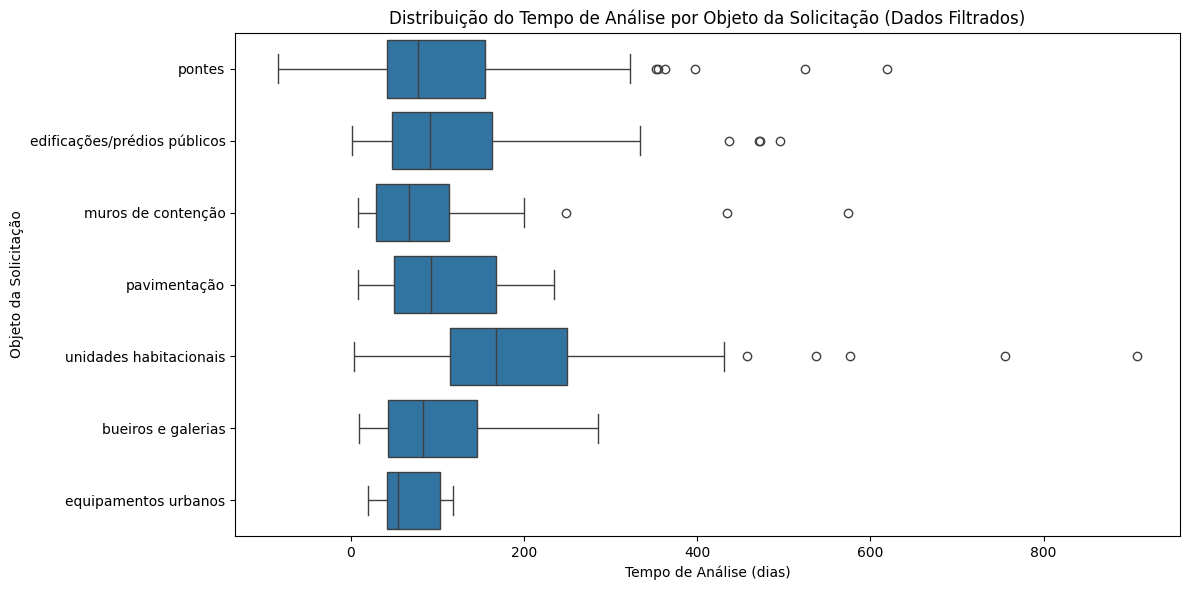


--- ESTATÍSTICAS DESCRITIVAS ---
                                n   média  mediana  desvio_padrão  mínimo  \
Objeto da Solicitação                                                       
bueiros e galerias             29  104.48     83.0          80.55      10   
edificações/prédios públicos   87  127.64     92.0         112.86       1   
equipamentos urbanos            7   68.57     54.0          39.17      20   
muros de contenção             60   92.33     67.5          96.33       8   
pavimentação                   49  106.31     93.0          69.70       8   
pontes                        229  106.96     78.0          96.10     -84   
unidades habitacionais         82  209.79    168.0         153.73       4   

                              máximo  
Objeto da Solicitação                 
bueiros e galerias               285  
edificações/prédios públicos     496  
equipamentos urbanos             118  
muros de contenção               574  
pavimentação                     235  

C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\1229883133.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p = tabela_anova['PR(>F)'][0]
C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\1229883133.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = tabela_anova['sum_sq'][0]


                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                       group2            meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------------------------------
          bueiros e galerias edificações/prédios públicos  23.1609 0.9508   -44.466  90.7879  False
          bueiros e galerias         equipamentos urbanos -35.9113 0.9849  -168.728  96.9053  False
          bueiros e galerias           muros de contenção -12.1494 0.9988   -83.479  59.1802  False
          bueiros e galerias                 pavimentação   1.8234    1.0   -72.069  75.7157  False
          bueiros e galerias                       pontes   2.4736    1.0  -59.6909  64.6381  False
          bueiros e galerias       unidades habitacionais 105.3099 0.0001   37.1695 173.4504   True
edificações/prédios públicos         equipamentos urbanos -59.0722 0.7959 -182.9818  64.8373  False


<Figure size 1000x600 with 0 Axes>

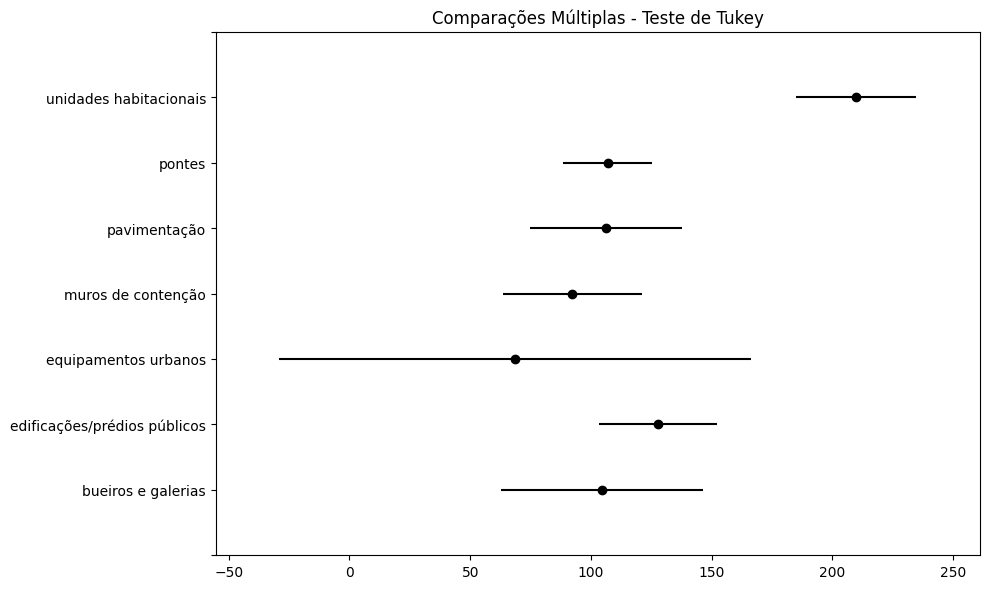


=== RESUMO FINAL ===
• Amostra analisada: 543 observações
• Categorias incluídas: 7
• Categorias excluídas: 10
• Categorias analisadas: ['pontes', 'edificações/prédios públicos', 'unidades habitacionais', 'muros de contenção', 'pavimentação', 'bueiros e galerias', 'equipamentos urbanos']


In [31]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparação dos Dados
print("=== PREPARAÇÃO DOS DADOS PARA ANOVA ===\n")

# Garante que não há NaNs nas colunas críticas
df_anova = df_categorias.dropna(subset=['analise_dias', 'Objeto da Solicitação']).copy()

print(f"Tamanho inicial da amostra: {len(df_anova)}")
print(f"Número inicial de categorias: {df_anova['Objeto da Solicitação'].nunique()}")

# 2. Filtrar categorias com número suficiente de dados
print("\n--- FILTRAGEM DE CATEGORIAS ---")

# Definir mínimo de observações por categoria (recomendado: pelo menos 5-10)
min_observacoes = 5

categoria_counts = df_anova['Objeto da Solicitação'].value_counts()
print("Distribuição original:")
print(categoria_counts)

# Manter apenas categorias com número suficiente de observações
categorias_validas = categoria_counts[categoria_counts >= min_observacoes].index
df_filtrado = df_anova[df_anova['Objeto da Solicitação'].isin(categorias_validas)].copy()

print(f"\nFiltro aplicado: mínimo de {min_observacoes} observações por categoria")
print(f"Categorias válidas após filtro: {len(categorias_validas)}")
print(f"Novo tamanho da amostra: {len(df_filtrado)}")
print(f"Redução de {len(df_anova) - len(df_filtrado)} observações removidas")

# 3. Visualização dos dados filtrados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='analise_dias', y='Objeto da Solicitação')
plt.title('Distribuição do Tempo de Análise por Objeto da Solicitação (Dados Filtrados)')
plt.xlabel('Tempo de Análise (dias)')
plt.ylabel('Objeto da Solicitação')
plt.tight_layout()
plt.show()

# 4. Estatísticas descritivas
print("\n--- ESTATÍSTICAS DESCRITIVAS ---")
estatisticas = df_filtrado.groupby('Objeto da Solicitação')['analise_dias'].agg([
    ('n', 'count'),
    ('média', 'mean'),
    ('mediana', 'median'),
    ('desvio_padrão', 'std'),
    ('mínimo', 'min'),
    ('máximo', 'max')
]).round(2)

print(estatisticas)

# 5. Verificação de variabilidade
print("\n--- VERIFICAÇÃO DE VARIABILIDADE ---")
variabilidade = df_filtrado.groupby('Objeto da Solicitação')['analise_dias'].std()
print("Desvio padrão por categoria:")
print(variabilidade)

# Verificar se há categorias com variabilidade muito baixa
categorias_sem_variabilidade = variabilidade[variabilidade < 1].index
if len(categorias_sem_variabilidade) > 0:
    print(f"\n⚠️  Categorias com pouca variabilidade: {list(categorias_sem_variabilidade)}")

# 6. ANOVA - SOLUÇÃO ALTERNATIVA (renomeando coluna)
print("\n=== EXECUÇÃO DA ANOVA ===\n")

# Renomear coluna para evitar problemas de sintaxe
df_filtrado_renomeado = df_filtrado.rename(columns={'Objeto da Solicitação': 'Objeto'})

try:
    # Modelo ANOVA
    modelo = ols('analise_dias ~ C(Objeto)', data=df_filtrado_renomeado).fit()
    tabela_anova = anova_lm(modelo)
    
    print("--- TABELA ANOVA ---")
    print(tabela_anova)
    
    # 7. Interpretação dos resultados
    valor_p = tabela_anova['PR(>F)'][0]
    
    print(f"\n--- RESULTADOS ---")
    print(f"Valor P: {valor_p:.10f}")
    print(f"Valor P (notação científica): {valor_p:.2e}")
    
    alpha = 0.05
    if valor_p < alpha:
        print(f"\n✅ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.4e}) é menor que {alpha}.")
        print("Há uma diferença estatisticamente significativa no tempo médio de análise entre os Objetos da Solicitação.")
        
        # Calcular tamanho do efeito
        ss_between = tabela_anova['sum_sq'][0]
        ss_total = tabela_anova['sum_sq'].sum()
        eta_squared = ss_between / ss_total
        
        print(f"📊 Tamanho do efeito (Eta-squared): {eta_squared:.4f}")
        
        # Interpretação do tamanho do efeito
        if eta_squared < 0.01:
            print("   Magnitude do efeito: Muito pequena")
        elif eta_squared < 0.06:
            print("   Magnitude do efeito: Pequena")
        elif eta_squared < 0.14:
            print("   Magnitude do efeito: Média")
        else:
            print("   Magnitude do efeito: Grande")
            
        # 8. Teste Post-Hoc (Tukey HSD)
        print(f"\n--- TESTE POST-HOC (TUKEY HSD) ---")
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        
        tukey = pairwise_tukeyhsd(
            endog=df_filtrado_renomeado['analise_dias'],
            groups=df_filtrado_renomeado['Objeto'],
            alpha=0.05
        )
        
        print(tukey)
        
        # Visualizar resultados do Tukey
        plt.figure(figsize=(10, 6))
        tukey.plot_simultaneous()
        plt.title('Comparações Múltiplas - Teste de Tukey')
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"\n❌ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.5f}) é maior ou igual a {alpha}.")
        print("Não há evidência estatística de que o tempo médio de análise varie por Objeto da Solicitação.")
        
except Exception as e:
    print(f"❌ Erro na execução da ANOVA: {e}")
    
    # Tentativa com abordagem alternativa
    print("\n--- TENTATIVA COM ABORDAGEM ALTERNATIVA ---")
    try:
        from scipy.stats import f_oneway
        
        # Preparar dados para one-way ANOVA do scipy
        grupos = []
        for categoria in df_filtrado_renomeado['Objeto'].unique():
            grupo = df_filtrado_renomeado[df_filtrado_renomeado['Objeto'] == categoria]['analise_dias']
            grupos.append(grupo)
        
        stat, valor_p = f_oneway(*grupos)
        
        print(f"Estatística F: {stat:.4f}")
        print(f"Valor P: {valor_p:.10f}")
        print(f"Valor P (notação científica): {valor_p:.2e}")
        
        if valor_p < 0.05:
            print("✅ Diferença estatisticamente significativa (ANOVA alternativa)")
        else:
            print("❌ Sem diferença estatisticamente significativa (ANOVA alternativa)")
            
    except Exception as e2:
        print(f"❌ Erro também na abordagem alternativa: {e2}")

# 9. Resumo final
print(f"\n=== RESUMO FINAL ===")
print(f"• Amostra analisada: {len(df_filtrado)} observações")
print(f"• Categorias incluídas: {len(categorias_validas)}")
print(f"• Categorias excluídas: {df_anova['Objeto da Solicitação'].nunique() - len(categorias_validas)}")
print(f"• Categorias analisadas: {list(categorias_validas)}")

In [32]:
# Seleciona as colunas do DataFrame LIMPO
coluna_x = df_categorias['analise_dias']
coluna_y = df_categorias['icm_rank']

# A função spearmanr retorna dois valores: # 1. O coeficiente de correlação (rho) # 2. O valor p (p-value)

coeficiente_rho, valor_p = spearmanr(coluna_x, coluna_y)

# ----------------------------------------------------
# 3. INTERPRETAÇÃO DOS RESULTADOS
# ----------------------------------------------------


print("\nCorrelação entre ICM e dias de análise")

print(f"Coeficiente de Correlação Spearman (ρ): {coeficiente_rho:.3f}")
print(f"Valor P (p-value): {valor_p:.3f}")



if valor_p < 0.05:
    print("\n✅ A correlação é ESTATISTICAMENTE SIGNIFICATIVA (p < 0.05).")
else:
    print("\n❌ A correlação NÃO é estatisticamente significativa (p >= 0.05).")

if coeficiente_rho > 0.1:
    print("Conclusão: Existe uma correlação positiva moderada. Quanto maior o rank do ICM (melhor a categoria), maior o tempo de análise.")
elif coeficiente_rho < -0.1:
    print("Conclusão: Existe uma correlação negativa moderada. Quanto maior o rank do ICM (melhor a categoria), menor o tempo de análise.")
else:
    print("Conclusão: A correlação é muito fraca ou inexistente.")


Correlação entre ICM e dias de análise
Coeficiente de Correlação Spearman (ρ): nan
Valor P (p-value): nan

❌ A correlação NÃO é estatisticamente significativa (p >= 0.05).
Conclusão: A correlação é muito fraca ou inexistente.


=== PREPARAÇÃO DOS DADOS PARA ANOVA ===

Tamanho inicial da amostra: 563
Número inicial de categorias: 17

--- FILTRAGEM DE CATEGORIAS ---
Distribuição original:
Objeto da Solicitação
pontes                          229
edificações/prédios públicos     87
unidades habitacionais           82
muros de contenção               60
pavimentação                     49
bueiros e galerias               29
equipamentos urbanos              7
canais de drenagem                4
quadras poliesportivas            4
barragens e açudes                3
campo de futebol                  2
cais e docas                      2
materiais de construção           1
defesas costeiras                 1
rede de água potável              1
sistema de captação de água       1
praças                            1
Name: count, dtype: int64

Filtro aplicado: mínimo de 5 observações por categoria
Categorias válidas após filtro: 7
Novo tamanho da amostra: 543
Redução de 20 observações removidas


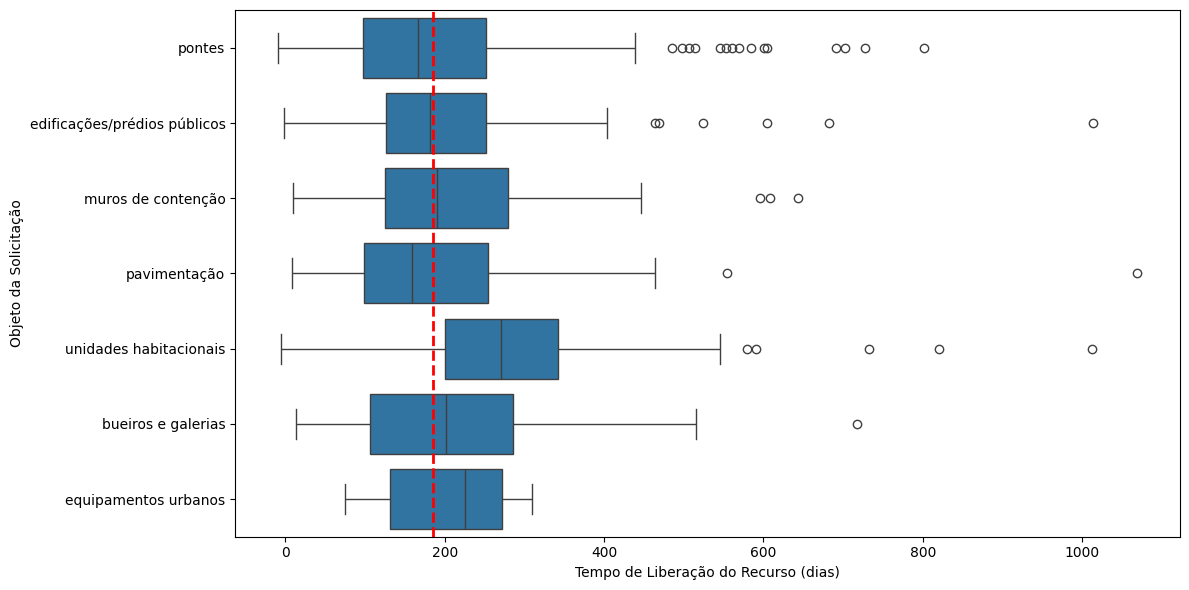


--- ESTATÍSTICAS DESCRITIVAS ---
                                n   média  mediana  desvio_padrão  mínimo  \
Objeto da Solicitação                                                       
bueiros e galerias             29  217.76    202.0         161.93      14   
edificações/prédios públicos   87  209.82    182.0         149.82      -2   
equipamentos urbanos            7  202.57    225.0          91.48      75   
muros de contenção             60  219.37    190.0         132.78      10   
pavimentação                   49  202.14    159.0         175.03       9   
pontes                        229  197.20    167.0         145.22      -9   
unidades habitacionais         82  299.61    271.0         164.05      -5   

                              máximo  
Objeto da Solicitação                 
bueiros e galerias               718  
edificações/prédios públicos    1014  
equipamentos urbanos             310  
muros de contenção               643  
pavimentação                    1069  

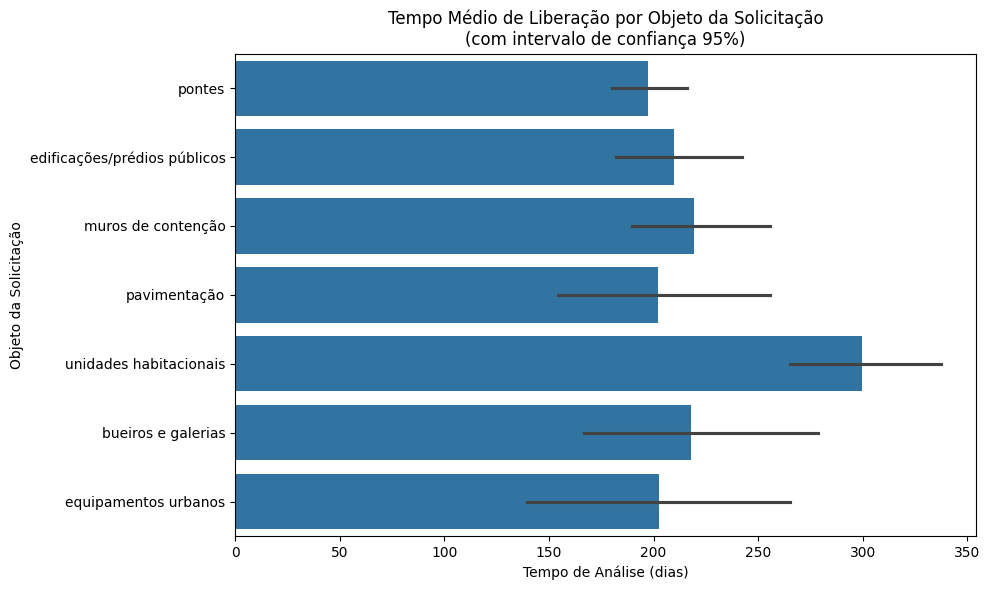


--- VERIFICAÇÃO DE VARIABILIDADE ---
Desvio padrão por categoria:
Objeto da Solicitação
bueiros e galerias              161.926274
edificações/prédios públicos    149.822184
equipamentos urbanos             91.478335
muros de contenção              132.776091
pavimentação                    175.027260
pontes                          145.222004
unidades habitacionais          164.051389
Name: liberacao_dias, dtype: float64

=== EXECUÇÃO DA ANOVA ===

--- TABELA ANOVA ---
              df        sum_sq        mean_sq         F    PR(>F)
C(Objeto)    6.0  6.648647e+05  110810.791631  4.862941  0.000075
Residual   536.0  1.221372e+07   22786.786725       NaN       NaN
✅ Tabela ANOVA salva em 'figuras_anova/tabela_anova.csv'

--- RESULTADOS ---
Valor P: 0.0000750834
Valor P (notação científica): 7.51e-05

✅ CONCLUSÃO ESTATÍSTICA: O Valor P (7.5083e-05) é menor que 0.05.
Há uma diferença estatisticamente significativa no tempo médio de liberação de recursos entre os Objetos da Solicitação.


C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\1932095357.py:115: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p = tabela_anova['PR(>F)'][0]
C:\Users\jpier\AppData\Local\Temp\ipykernel_23488\1932095357.py:127: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = tabela_anova['sum_sq'][0]


                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                       group2            meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------------------------------
          bueiros e galerias edificações/prédios públicos  -7.9425    1.0 -103.7373  87.8522  False
          bueiros e galerias         equipamentos urbanos -15.1872    1.0 -203.3244   172.95  False
          bueiros e galerias           muros de contenção    1.608    1.0  -99.4316 102.6477  False
          bueiros e galerias                 pavimentação -15.6158 0.9994 -120.2856  89.0541  False
          bueiros e galerias                       pontes -20.5621 0.9931 -108.6192   67.495  False
          bueiros e galerias       unidades habitacionais  81.8511 0.1578   -14.671 178.3733  False
edificações/prédios públicos         equipamentos urbanos  -7.2447    1.0 -182.7647 168.2754  False


<Figure size 1200x800 with 0 Axes>

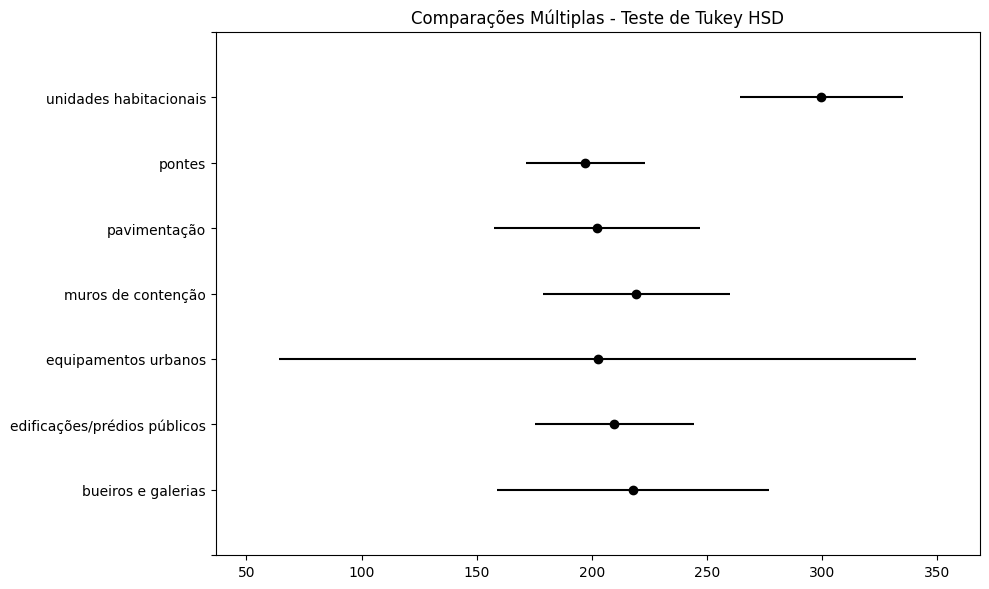

❌ Erro na execução da ANOVA: list indices must be integers or slices, not tuple

--- TENTATIVA COM ABORDAGEM ALTERNATIVA ---
Estatística F: 4.8629
Valor P: 0.0000750834
Valor P (notação científica): 7.51e-05
✅ Diferença estatisticamente significativa (ANOVA alternativa)

=== RESUMO FINAL ===
• Amostra analisada: 543 observações
• Categorias incluídas: 7
• Categorias excluídas: 10
• Categorias analisadas: ['pontes', 'edificações/prédios públicos', 'unidades habitacionais', 'muros de contenção', 'pavimentação', 'bueiros e galerias', 'equipamentos urbanos']

✅ Todas as figuras e resultados salvos na pasta 'figuras_anova/'
📁 Arquivos gerados:
   - boxplot_tempo_analise.png/.pdf
   - medias_com_intervalo_confianca.png/.pdf
   - estatisticas_descritivas.csv
   - tabela_anova.csv
   - resultado_tukey.txt (se aplicável)
   - tukey_comparacoes_multiplas.png/.pdf (se aplicável)
   - diferencas_significativas_tukey.png/.pdf (se aplicável)
   - resumo_analise.txt


<Figure size 1000x600 with 0 Axes>

In [35]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Criar diretório para salvar as figuras (se não existir)
os.makedirs('figuras_anova', exist_ok=True)

# 1. Preparação dos Dados
print("=== PREPARAÇÃO DOS DADOS PARA ANOVA ===\n")

# Garante que não há NaNs nas colunas críticas
df_anova = df_categorias.dropna(subset=['liberacao_dias', 'Objeto da Solicitação']).copy()

print(f"Tamanho inicial da amostra: {len(df_anova)}")
print(f"Número inicial de categorias: {df_anova['Objeto da Solicitação'].nunique()}")

# 2. Filtrar categorias com número suficiente de dados
print("\n--- FILTRAGEM DE CATEGORIAS ---")

# Definir mínimo de observações por categoria (recomendado: pelo menos 5-10)
min_observacoes = 5

categoria_counts = df_anova['Objeto da Solicitação'].value_counts()
print("Distribuição original:")
print(categoria_counts)

# Manter apenas categorias com número suficiente de observações
categorias_validas = categoria_counts[categoria_counts >= min_observacoes].index
df_filtrado = df_anova[df_anova['Objeto da Solicitação'].isin(categorias_validas)].copy()

print(f"\nFiltro aplicado: mínimo de {min_observacoes} observações por categoria")
print(f"Categorias válidas após filtro: {len(categorias_validas)}")
print(f"Novo tamanho da amostra: {len(df_filtrado)}")
print(f"Redução de {len(df_anova) - len(df_filtrado)} observações removidas")

# 3. Visualização dos dados filtrados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='liberacao_dias', y='Objeto da Solicitação')

# --- INCLUSÃO DA LINHA DE REFERÊNCIA ---
plt.axvline(x=186, color='red', linestyle='--', linewidth=2, label='Meta (186 dias)')
# --

#plt.title('Distribuição do Tempo de Liberação dos Recursos por Objeto da Solicitação (Dados Filtrados)')
plt.xlabel('Tempo de Liberação do Recurso (dias)')
#plt.ylabel('Objeto da Solicitação')
plt.tight_layout()
plt.savefig('figuras_anova/boxplot_tempo_liberacao.png', dpi=300, bbox_inches='tight')
plt.savefig('figuras_anova/boxplot_tempo_liberacao.pdf', bbox_inches='tight')
plt.show()

# 4. Estatísticas descritivas
print("\n--- ESTATÍSTICAS DESCRITIVAS ---")
estatisticas = df_filtrado.groupby('Objeto da Solicitação')['liberacao_dias'].agg([
    ('n', 'count'),
    ('média', 'mean'),
    ('mediana', 'median'),
    ('desvio_padrão', 'std'),
    ('mínimo', 'min'),
    ('máximo', 'max')
]).round(2)

print(estatisticas)

# Salvar estatísticas descritivas em CSV
estatisticas.to_csv('figuras_anova/estatisticas_descritivas.csv', encoding='utf-8-sig')
print("\n✅ Estatísticas descritivas salvas em 'figuras_anova/estatisticas_descritivas.csv'")

# 5. Gráfico de médias com intervalos de confiança
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtrado, x='liberacao_dias', y='Objeto da Solicitação', errorbar='ci')
plt.title('Tempo Médio de Liberação por Objeto da Solicitação\n(com intervalo de confiança 95%)')
plt.xlabel('Tempo de Análise (dias)')
plt.ylabel('Objeto da Solicitação')
plt.tight_layout()
plt.savefig('figuras_anova/medias_com_intervalo_confianca2.png', dpi=300, bbox_inches='tight')
plt.savefig('figuras_anova/medias_com_intervalo_confianca2.pdf', bbox_inches='tight')
plt.show()

# 6. Verificação de variabilidade
print("\n--- VERIFICAÇÃO DE VARIABILIDADE ---")
variabilidade = df_filtrado.groupby('Objeto da Solicitação')['liberacao_dias'].std()
print("Desvio padrão por categoria:")
print(variabilidade)

# Verificar se há categorias com variabilidade muito baixa
categorias_sem_variabilidade = variabilidade[variabilidade < 1].index
if len(categorias_sem_variabilidade) > 0:
    print(f"\n⚠️  Categorias com pouca variabilidade: {list(categorias_sem_variabilidade)}")

# 7. ANOVA - SOLUÇÃO ALTERNATIVA (renomeando coluna)
print("\n=== EXECUÇÃO DA ANOVA ===\n")

# Renomear coluna para evitar problemas de sintaxe
df_filtrado_renomeado = df_filtrado.rename(columns={'Objeto da Solicitação': 'Objeto'})

try:
    # Modelo ANOVA
    modelo = ols('liberacao_dias ~ C(Objeto)', data=df_filtrado_renomeado).fit()
    tabela_anova = anova_lm(modelo)
    
    print("--- TABELA ANOVA ---")
    print(tabela_anova)
    
    # Salvar tabela ANOVA em CSV
    tabela_anova.to_csv('figuras_anova/tabela_anova.csv', encoding='utf-8-sig')
    print("✅ Tabela ANOVA salva em 'figuras_anova/tabela_anova.csv'")
    
    # 8. Interpretação dos resultados
    valor_p = tabela_anova['PR(>F)'][0]
    
    print(f"\n--- RESULTADOS ---")
    print(f"Valor P: {valor_p:.10f}")
    print(f"Valor P (notação científica): {valor_p:.2e}")
    
    alpha = 0.05
    if valor_p < alpha:
        print(f"\n✅ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.4e}) é menor que {alpha}.")
        print("Há uma diferença estatisticamente significativa no tempo médio de liberação de recursos entre os Objetos da Solicitação.")
        
        # Calcular tamanho do efeito
        ss_between = tabela_anova['sum_sq'][0]
        ss_total = tabela_anova['sum_sq'].sum()
        eta_squared = ss_between / ss_total
        
        print(f"📊 Tamanho do efeito (Eta-squared): {eta_squared:.4f}")
        
        # Interpretação do tamanho do efeito
        if eta_squared < 0.01:
            print("   Magnitude do efeito: Muito pequena")
        elif eta_squared < 0.06:
            print("   Magnitude do efeito: Pequena")
        elif eta_squared < 0.14:
            print("   Magnitude do efeito: Média")
        else:
            print("   Magnitude do efeito: Grande")
            
        # 9. Teste Post-Hoc (Tukey HSD)
        print(f"\n--- TESTE POST-HOC (TUKEY HSD) ---")
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        
        tukey = pairwise_tukeyhsd(
            endog=df_filtrado_renomeado['liberacao_dias'],
            groups=df_filtrado_renomeado['Objeto'],
            alpha=0.05
        )
        
        print(tukey)
        
        # Salvar resultados do Tukey em texto
        with open('figuras_anova/resultado_tukey.txt', 'w', encoding='utf-8') as f:
            f.write("RESULTADOS DO TESTE TUKEY HSD\n")
            f.write("=" * 50 + "\n")
            f.write(str(tukey))
        
        # Visualizar resultados do Tukey
        plt.figure(figsize=(12, 8))
        tukey.plot_simultaneous()
        plt.title('Comparações Múltiplas - Teste de Tukey HSD')
        plt.tight_layout()
        plt.savefig('figuras_anova/tukey_comparacoes_multiplas2.png', dpi=300, bbox_inches='tight')
        plt.savefig('figuras_anova/tukey_comparacoes_multiplas2.pdf', bbox_inches='tight')
        plt.show()
        
        # Gráfico de resumo do Tukey
        plt.figure(figsize=(10, 6))
        tukey_summary = tukey.summary()
        significant_results = tukey_summary[tukey_summary[:, 6] == True]  # Coluna 'reject'
        
        if len(significant_results) > 0:
            grupos1 = significant_results[:, 0]
            grupos2 = significant_results[:, 1]
            diferencas = significant_results[:, 3]
            
            plt.barh(range(len(grupos1)), diferencas)
            plt.yticks(range(len(grupos1)), [f"{g1} vs {g2}" for g1, g2 in zip(grupos1, grupos2)])
            plt.xlabel('Diferença Média')
            plt.title('Diferenças Significativas entre Grupos (Tukey HSD)')
            plt.tight_layout()
            plt.savefig('figuras_anova/diferencas_significativas_tukey.png', dpi=300, bbox_inches='tight')
            plt.savefig('figuras_anova/diferencas_significativas_tukey.pdf', bbox_inches='tight')
            plt.show()
        
    else:
        print(f"\n❌ CONCLUSÃO ESTATÍSTICA: O Valor P ({valor_p:.5f}) é maior ou igual a {alpha}.")
        print("Não há evidência estatística de que o tempo médio de liberação de recursos por Objeto da Solicitação.")
        
except Exception as e:
    print(f"❌ Erro na execução da ANOVA: {e}")
    
    # Tentativa com abordagem alternativa
    print("\n--- TENTATIVA COM ABORDAGEM ALTERNATIVA ---")
    try:
        from scipy.stats import f_oneway
        
        # Preparar dados para one-way ANOVA do scipy
        grupos = []
        for categoria in df_filtrado_renomeado['Objeto'].unique():
            grupo = df_filtrado_renomeado[df_filtrado_renomeado['Objeto'] == categoria]['liberacao_dias']
            grupos.append(grupo)
        
        stat, valor_p = f_oneway(*grupos)
        
        print(f"Estatística F: {stat:.4f}")
        print(f"Valor P: {valor_p:.10f}")
        print(f"Valor P (notação científica): {valor_p:.2e}")
        
        # Salvar resultados da ANOVA alternativa
        with open('figuras_anova/anova_alternativa.txt', 'w', encoding='utf-8') as f:
            f.write("RESULTADOS ANOVA ALTERNATIVA (scipy)\n")
            f.write("=" * 40 + "\n")
            f.write(f"Estatística F: {stat:.4f}\n")
            f.write(f"Valor P: {valor_p:.10f}\n")
            f.write(f"Valor P (científica): {valor_p:.2e}\n")
        
        if valor_p < 0.05:
            print("✅ Diferença estatisticamente significativa (ANOVA alternativa)")
        else:
            print("❌ Sem diferença estatisticamente significativa (ANOVA alternativa)")
            
    except Exception as e2:
        print(f"❌ Erro também na abordagem alternativa: {e2}")

# 10. Resumo final
print(f"\n=== RESUMO FINAL ===")
print(f"• Amostra analisada: {len(df_filtrado)} observações")
print(f"• Categorias incluídas: {len(categorias_validas)}")
print(f"• Categorias excluídas: {df_anova['Objeto da Solicitação'].nunique() - len(categorias_validas)}")
print(f"• Categorias analisadas: {list(categorias_validas)}")

# Salvar resumo em arquivo
with open('figuras_anova/resumo_analise.txt', 'w', encoding='utf-8') as f:
    f.write("RESUMO DA ANÁLISE ANOVA\n")
    f.write("=" * 30 + "\n")
    f.write(f"Amostra analisada: {len(df_filtrado)} observações\n")
    f.write(f"Categorias incluídas: {len(categorias_validas)}\n")
    f.write(f"Categorias excluídas: {df_anova['Objeto da Solicitação'].nunique() - len(categorias_validas)}\n")
    f.write(f"Valor P: {valor_p:.10f}\n")
    f.write(f"Significativo (p < 0.05): {'SIM' if valor_p < 0.05 else 'NÃO'}\n")

print("\n✅ Todas as figuras e resultados salvos na pasta 'figuras_anova/'")
print("📁 Arquivos gerados:")
print("   - boxplot_tempo_analise.png/.pdf")
print("   - medias_com_intervalo_confianca.png/.pdf")
print("   - estatisticas_descritivas.csv")
print("   - tabela_anova.csv")
print("   - resultado_tukey.txt (se aplicável)")
print("   - tukey_comparacoes_multiplas.png/.pdf (se aplicável)")
print("   - diferencas_significativas_tukey.png/.pdf (se aplicável)")
print("   - resumo_analise.txt")